<font color=#FF0000 size='6'>**Feature Engineering**</font> 
----


In terms of Wikipedia website:

- **Feature engineering is the process of using domain knowledge to extract features from raw data via macine learning techniques. These features can be used to improve the performance of machine learning algorithms. Feature engineering can be considered as applied machine learning itself** [[Wiki](https://en.wikipedia.org/wiki/Feature_engineering)]


Another important definition of Feature Engineering is as follows:

- **Coming up with features is difficult, time-consuming, requires expert knowledge. "Applied machine learning" is basically feature engineering.**


Andrew Ng, Machine Learning and AI via Brain simulations:

- **So, feature engineering is the process of creating useful features in a machine learning model. We can see that the success of any machine-learning model depends on the application of various feature engineering techniques.**

----

The feature engineering techniques that we will discuss in this kernel are as follows:

0. Identify duplicates
1. Missing data imputation
2. Outlier detection 
3. Categorical encoding
4. Variable transformation
5. Normalize / Standardize / Scaling
6. Feature Selection
7. Feature Extraction
8. Discretization



In [1]:
import numpy as np
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
#import statsmodels.api as sm
import statistics

import math

In [2]:
sns.set_style("white")
sns.set_palette("rocket")
# ignore warnings
import warnings
warnings.simplefilter(action = "ignore", category = FutureWarning)
warnings.simplefilter(action = "ignore", category = RuntimeWarning)

In [3]:
import category_encoders as ce

<font color='maroon' size='5'>Identify Duplicates</font>
---

----

<font color='darkviolet' size='4'>Duplicate in all columns</font>
---

The function `duplicated` will return a Boolean series indicating if that row is a duplicate.  The parameter `keep` can take on the values **'first'** (default) to label the first duplicate **False** and the rest **True**, **'last'** to mark the last duplicate **False** and the rest **True**, or **False** to mark all duplicates **True**.

----

In [4]:
diamondDf = sns.load_dataset('diamonds')
diamondDf.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [5]:
diamondDf.shape

(53940, 10)

In [6]:
nDuplicates = diamondDf.duplicated().sum()
print(f"You seem to have {nDuplicates} duplicates in your dataset.")

You seem to have 146 duplicates in your dataset.


In [7]:
diamondDf[diamondDf.duplicated(keep=False)]

,carat,cut,color,clarity,depth,table,price,x,y,z
1004,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
1005,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
1006,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
1007,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
1008,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
...,...,...,...,...,...,...,...,...,...,...
49557,0.71,Good,F,SI2,64.1,60.0,2130,0.00,0.00,0.00
50078,0.51,Ideal,F,VVS2,61.2,56.0,2203,5.19,5.17,3.17
50079,0.51,Ideal,F,VVS2,61.2,56.0,2203,5.19,5.17,3.17
52860,0.50,Fair,E,VS2,79.0,73.0,2579,5.21,5.18,4.09


<font color='darkviolet' size='3'>Delete only if all columns are duplicated</font>
---

The function `drop_duplicates` will return a dataframe after dropping duplicates.  The parameter `keep` can take on the values **'first'** (default) to keep the first duplicate and drop the rest, **'last'** to keep the last duplicate and drop the rest, or **False** to drop all duplicates.

In [8]:
diaDubClean=diamondDf.drop_duplicates()
diaDubClean.shape

(53794, 10)

<font color='darkviolet' size='4'>Duplicate in selected columns</font>
---

The function `duplicated` will return a Boolean series indicating if that row is a duplicate based on just the specified columns when the parameter `subset` is passed a list of the columns to use

In [9]:
dups = diamondDf.duplicated(subset=['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'])
dups.sum()

146

In [10]:
dups = diamondDf.duplicated(subset=['carat', 'color', 'clarity', 'depth', 'price', 'x', 'y', 'z'])
dups.sum()

360

<font color='darkviolet' size='3'>Delete only if specified columns are duplicated</font>
----

The function `drop_duplicates` will return a dataframe after dropping all duplicates based on just the specified columns when the parameter `subset` is passed a list of the columns to use (in this case, **A** and **B**).

In [11]:
_df = diamondDf.drop_duplicates(subset=['carat', 'color', 'clarity', 'depth', 'price', 'x', 'y',
       'z'])
_df.shape

(53580, 10)

<font color='maroon' size='5'>Missing Data Imputation</font>
----

There are 2 primary ways of handling missing values:
1. Deleting the Missing Values
2. Imputing the Missing Values


<img src="missingVals.webp"  width="63%" height="63%">



<font color='darkviolet' size='3'>Deleting the Missing Values</font>
----
- Deleting the entire row
- Deleting the entire column
- Pairwise Deletion

<font color='darkviolet' size='3'>Imputing the Missing Values</font>
----
- Replacing with an arbitrary value
- Fill missing values with a test statistic 
    - Replacing with the mean: numeric features
    - Replacing with the mode: categorical features
    - Replacing with the median: better to use the median value for imputation in the case of **outliers**.
    - Replacing with the previous value – forward fill: mostly used in time series data
    - Replacing with the next value – backward fill
- Interpolation: methods like ‘polynomial,’ ‘linear,’ and ‘quadratic.’     
- Fill missing values with Imputer
- Build a Prediction Model
- KNN Imputation

---


- **Univariate Approach**
    - In a Univariate approach, only a single feature is taken into consideration. You can use the class SimpleImputer and replace the missing values with mean, mode, median, or some constant value.
    
        - `from sklearn.impute import SimpleImputer`
        - `imp = SimpleImputer(missing_values=np.nan, strategy='mean')`
        - `imp.fit([[1, 2], [np.nan, 3], [7, 6]])`
<br>
     
- **Multivariate Approach** 
    - In a multivariate approach, more than one feature is taken into consideration. There are two ways to impute missing values considering the multivariate approach. Using KNNImputer or IterativeImputer classes.
    
        - `from sklearn.experimental import enable_iterative_imputer`    
        - `from sklearn.impute import IterativeImputer`  
        - `impute_it = IterativeImputer()`
        - `impute_it.fit_transform(X)`
<br>
        
- **Nearest Neighbors Imputations (KNNImputer)**
    - Missing values are imputed using the k-Nearest Neighbors approach, where a Euclidean distance is used to find the nearest neighbors. Let’s take the above example of the titanic dataset to see how it works.
        - `from sklearn.impute import KNNImputer`
        - `impute_knn = KNNImputer(n_neighbors=2)`
        - `impute_knn.fit_transform(X)`



https://scikit-learn.org/stable/modules/impute.html#impute

In [12]:
penguinsDf = sns.load_dataset("penguins")
penguinsDf.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [13]:
penguinsDf.isnull().values.any()

True

In [14]:
# Catching the columns that have at least 1 misssing value 
penguinsDf[penguinsDf.isnull().any(axis=1)]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN
246,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN
286,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN
324,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,NaN


In [15]:
penNumDf=penguinsDf.select_dtypes(include=np.number)

In [16]:
# Using imputer to fill the missing data points
from sklearn.impute import SimpleImputer
# strategy= 'mean' / 'median' / 'most_frequent' / 'constant'
impMean = SimpleImputer(missing_values=np.nan, strategy='mean')  
impMean.fit(penNumDf)
impMean.transform(penNumDf[:10])

array([[  39.1       ,   18.7       ,  181.        , 3750.        ],
       [  39.5       ,   17.4       ,  186.        , 3800.        ],
       [  40.3       ,   18.        ,  195.        , 3250.        ],
       [  43.92192982,   17.15116959,  200.91520468, 4201.75438596],
       [  36.7       ,   19.3       ,  193.        , 3450.        ],
       [  39.3       ,   20.6       ,  190.        , 3650.        ],
       [  38.9       ,   17.8       ,  181.        , 3625.        ],
       [  39.2       ,   19.6       ,  195.        , 4675.        ],
       [  34.1       ,   18.1       ,  193.        , 3475.        ],
       [  42.        ,   20.2       ,  190.        , 4250.        ]])

In [17]:
penNumDf=penguinsDf.select_dtypes(include=np.number)
penNumDf.isnull().values.any()

True

In [18]:
from sklearn.impute import KNNImputer
impKnn = KNNImputer(n_neighbors=5)
penNumDf = pd.DataFrame(impKnn.fit_transform(penNumDf), columns=penNumDf.columns)
penNumDf.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,39.10000,18.70000,181.000000,3750.000000
1,39.50000,17.40000,186.000000,3800.000000
2,40.30000,18.00000,195.000000,3250.000000
3,43.92193,17.15117,200.915205,4201.754386
4,36.70000,19.30000,193.000000,3450.000000



<font color='maroon' size='5'>Outlier Detection</font>
---


Outliers are defined as those values that are unusually high or low with respect to the rest of the observations of the variable. Some of the techniques to handle outliers are:

1. Outlier removal

2. Treating outliers as missing values

3. Outlier capping

How to identify outliers?

For that, the basic form of detection is an extreme value analysis of data. If the distribution of the variable is Gaussian then outliers will lie outside the mean plus or minus three times the standard deviation of the variable. But if the variable is not normally distributed, then quantiles can be used. Calculate the quantiles and then inter quartile range:

**Inter quantile:** $75^{th}~quantile-25^{th}~quantile = Q_3-Q_1$
 
**upper boundary:** $75^{th}~quantile + (IQR * 1.5) = Q_3 + IQR * 1.5$

**lower boundary:** $25^{th}~quantile – (IQR * 1.5) = Q_1 - IQR * 1.5$

So, the outlier will sit outside these boundaries.

**1. Outlier removal**:
In this technique, simply remove outlier observations from the dataset. In datasets if outliers are not abundant, then dropping the outliers will not affect the data much. But if multiple variables have outliers then we may end up removing a big chunk of data from our dataset. So, this point has to be kept in mind whenever dropping the outliers.

**2. Treating outliers as missing values**:
You can also treat outliers as missing values. But then these missing values also have to be filled. So to fill missing values you can use any of the methods as discussed above in this article.

**3. Outlier capping**:
This procedure involves capping the maximum and minimum values at a predefined value. This value can be derived from the variable distribution. If a variable is normally distributed we can cap the maximum and minimum values at the mean plus or minus three times the standard deviation. But if the variable is skewed, we can use the inter-quantile range proximity rule or cap at the bottom percentiles.

**4. Outlier transformation**:
Data transformation techniques like logarithmic transformation or winsorization can be applied to reduce the impact of outliers.

**5. Model-based Approaches:**
Using statistical or ML models to identify and handle outliers. Instead of relying solely on traditional statistical methods or visual inspection, model-based approaches leverage the power of predictive models to detect outliers.
 
----


__How to Detect Outliers ?__

👉 __For Normal distributions__: Use empirical relations of Normal distribution.

       The data points which fall below mean-3*(sigma) or above mean+3*(sigma) are outliers.

where mean and sigma are the average value and standard deviation of a particular column.

👉 __For Skewed distributions__: Use Inter-Quartile Range (IQR) proximity rule __(Box Plot).__

    The data points which fall below Q1 – 1.5 IQR or above Q3 + 1.5 IQR are outliers.

where Q1 and Q3 are the 25th and 75th percentile of the dataset respectively, and IQR represents the inter-quartile range and given by Q3 – Q1.

----------------------


<img src="normIQR.png"  width="75%" height="75%">



In [19]:
diaDubClean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53794 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53794 non-null  float64 
 1   cut      53794 non-null  category
 2   color    53794 non-null  category
 3   clarity  53794 non-null  category
 4   depth    53794 non-null  float64 
 5   table    53794 non-null  float64 
 6   price    53794 non-null  int64   
 7   x        53794 non-null  float64 
 8   y        53794 non-null  float64 
 9   z        53794 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.4 MB


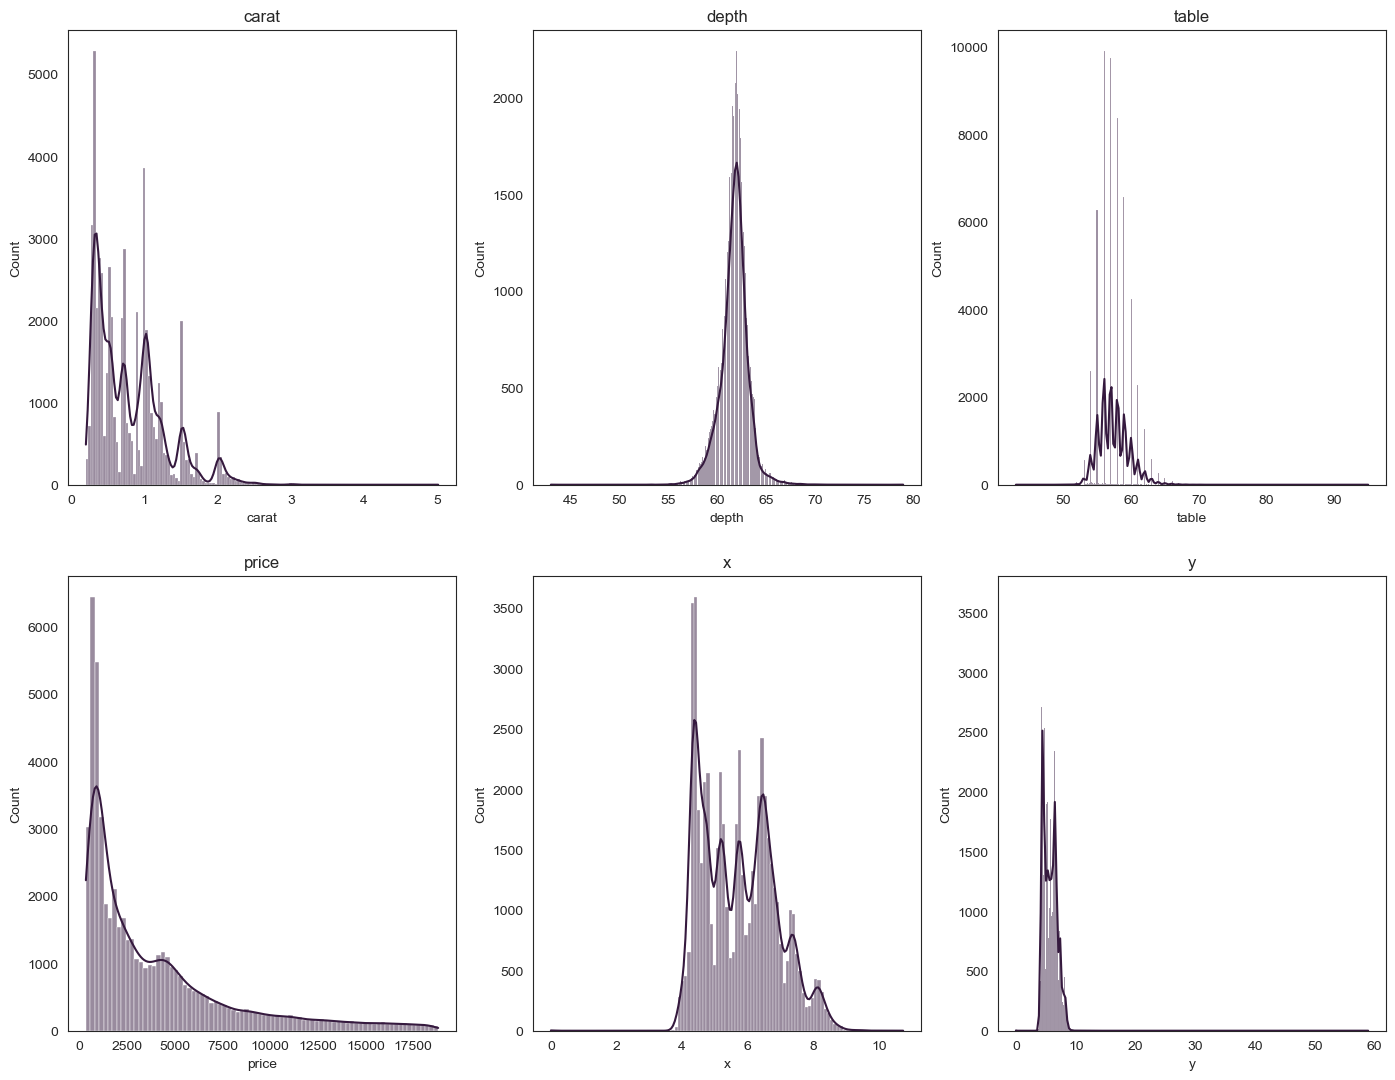

In [20]:
fig, axs = plt.subplots(2,3, figsize = (17,13))

axs[0,0].set_title('carat')
sns.histplot(data=diamondDf, x='carat', kde=True, ax=axs[0,0])
axs[0,1].set_title('depth')
sns.histplot(data=diamondDf, x='depth', kde=True, ax=axs[0,1])
axs[0,2].set_title('table')
sns.histplot(data=diamondDf, x='table', kde=True, ax=axs[0,2])
axs[1,0].set_title('price')
sns.histplot(data=diamondDf, x='price', kde=True, ax=axs[1,0])
axs[1,1].set_title('x')
sns.histplot(data=diamondDf, x='x', kde=True, ax=axs[1,1])
axs[1,2].set_title('y')
sns.histplot(data=diamondDf, x='y', kde=True, ax=axs[1,2])

plt.show()

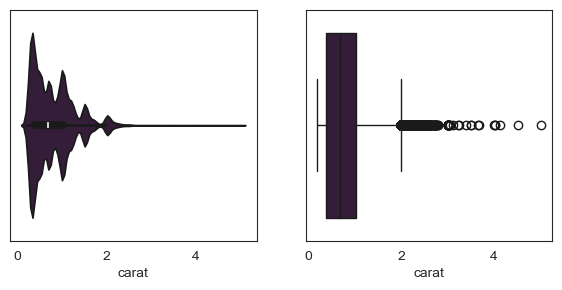

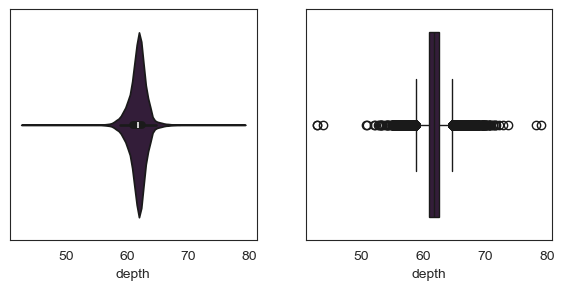

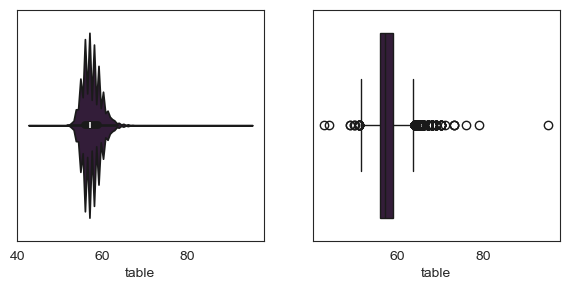

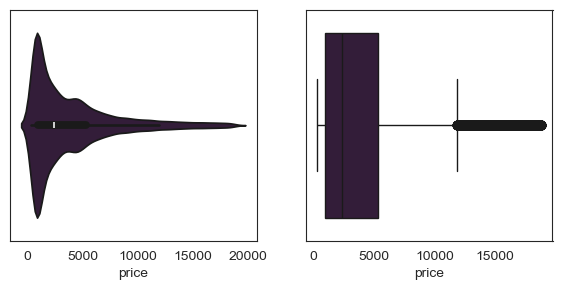

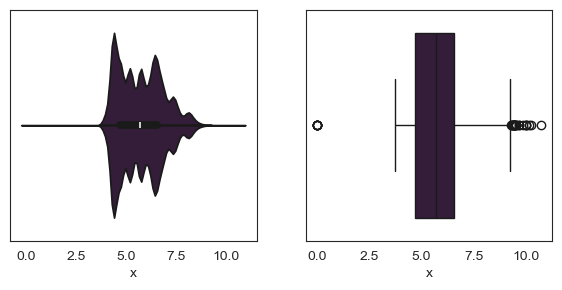

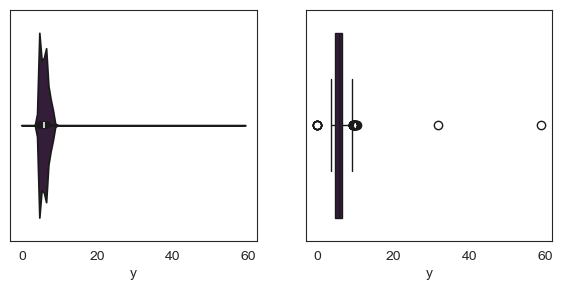

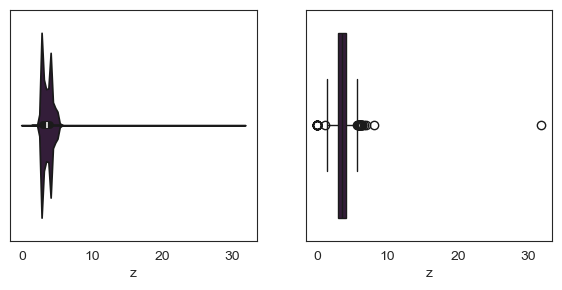

In [21]:
diaNumCols = diaDubClean.select_dtypes(include=np.number).columns

for feature in diaNumCols:
    plt.figure(figsize=(7, 3))
    plt.subplot(1, 2, 1)
    sns.violinplot(data=diaDubClean, x=feature)
    plt.subplot(1, 2, 2)
    sns.boxplot(data=diaDubClean, x=feature)
    plt.show()

In [22]:
def outlierThresholdsIQR(dataframe, colName, q1=0.25, q3=0.75):
    Q1 = dataframe[colName].quantile(q1)
    Q3 = dataframe[colName].quantile(q3)
    IQR = Q3 - Q1
    upperBoundary = Q3 + 1.5 * IQR
    lowerBoundary = Q1 - 1.5 * IQR
    return lowerBoundary, upperBoundary

In [23]:
# Lets add check outlier function for further needs (Return Boolean)
def checkOutlierIQR(dataframe, colName):
    lowerBoundary, upperBoundary = outlierThresholdsIQR(dataframe, colName)
    if dataframe[(dataframe[colName] > upperBoundary) | (dataframe[colName] < lowerBoundary)].any(axis=1).astype(int).sum() :
        return True
    else:
        return False

In [24]:
outlierThresholdsIQR(diaDubClean, 'carat')

(-0.5599999999999999, 2.0)

In [25]:
checkOutlierIQR(diaDubClean, 'carat')

True

In [26]:
for numFeature in diaNumCols:
    print(numFeature, checkOutlierIQR(diaDubClean, numFeature))

carat True
depth True
table True
price True
x True
y True
z True


In [27]:
# Dropping the outlier data points
def removeOutlierIQR(dataframe, colName):
    lowerBoundary, upperBoundary = outlierThresholdsIQR(dataframe, colName)
    withoutOutliers = dataframe[~((dataframe[colName] < lowerBoundary) | (dataframe[colName] > upperBoundary))]
    return withoutOutliers

In [28]:
removeOutlierIQR(diaDubClean, "carat").shape

(51921, 10)

In [29]:
diaWithoutOutliers=diaDubClean.copy()

In [30]:
diaNumCols=diaDubClean.select_dtypes(include=np.number).columns
for numFeature in diaNumCols:
    diaWithoutOutliers =  removeOutlierIQR(diaWithoutOutliers, numFeature)

<Axes: xlabel='carat'>

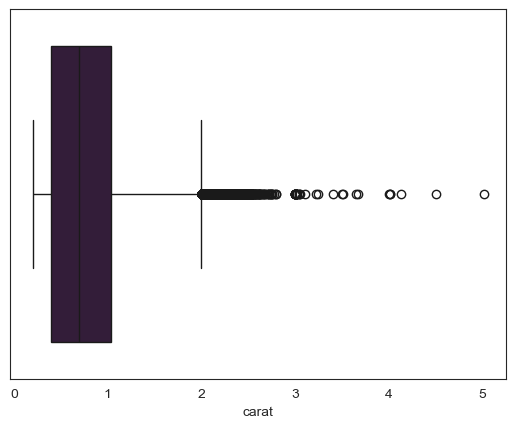

In [31]:
sns.boxplot(data=diaDubClean, x='carat')

<Axes: xlabel='carat'>

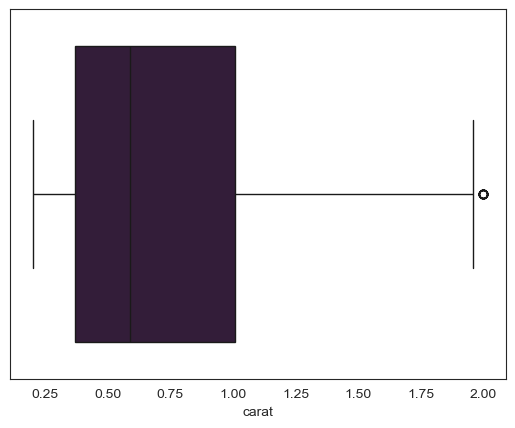

In [32]:
sns.boxplot(data=diaWithoutOutliers, x='carat')

In [33]:
def outlierThresholdsSTD(dataframe, colName):
    upperBoundary = dataframe[colName].mean() + 3 * dataframe[colName].std()
    lowerBoundary = dataframe[colName].mean() - 3 * dataframe[colName].std()
    return lowerBoundary, upperBoundary

In [34]:
def checkOutliersSTD(dataframe, colName):
    lowerBoundary, upperBoundary = outlierThresholdsSTD(dataframe, colName)
    if dataframe[(dataframe[colName] > upperBoundary) | (dataframe[colName] < lowerBoundary)].any(axis=1).astype(int).sum():
        return True
    else: 
        return False

In [35]:
# Dropping the outlier data points
def removeOutlierSTD(dataframe, colName):
    lowerBoundary, upperBoundary = outlierThresholdsSTD(dataframe, colName)
    withoutOutliers = dataframe[~((dataframe[colName] < lowerBoundary) | (dataframe[colName] > upperBoundary))]
    return withoutOutliers

In [36]:
for numFeature in diaNumCols:
    print(numFeature, checkOutliersSTD(diaDubClean, numFeature))

carat True
depth True
table True
price True
x True
y True
z True


In [37]:
def replaceWithThresholdsSTD(dataframe, cols, replace=False):
    from tabulate import tabulate
    data = []
    for colName in cols:
        if colName != 'Outcome':
            outliers_ = checkOutliersSTD(dataframe, colName)
            count = None
            lowerLimit, upperLimit = outlierThresholdsSTD(dataframe, colName)
            if outliers_:
                count = dataframe[(dataframe[colName] > upperLimit) | (dataframe[colName] < lowerLimit)][colName].count()
                if replace:
                    if lowerLimit < 0:
                        # We don't want to replace with negative values, right!
                        dataframe.loc[(dataframe[colName] > upperLimit), colName] = upperLimit
                    else:
                        dataframe.loc[(dataframe[colName] < lowerLimit), colName] = lowerLimit
                        dataframe.loc[(dataframe[colName] > upperLimit), colName] = upperLimit
            outliersStatus = checkOutliersSTD(dataframe, colName)
            data.append([outliers_, outliersStatus, count, colName, lowerLimit, upperLimit])
    table = tabulate(data, headers=['Outlier (Previously)','Outliers','Count', 'Column','Lower Limit', 'Upper Limit'], tablefmt='rst', numalign='right')
    print("Removing Outliers using 3 Standard Deviation")
    print(table)

In [38]:
replaceWithThresholdsSTD(diaDubClean, diaNumCols, replace=False)

Removing Outliers using 3 Standard Deviation
======================  ==========  =======  ========  =============  =============
Outlier (Previously)    Outliers      Count  Column      Lower Limit    Upper Limit
======================  ==========  =======  ========  =============  =============
True                    True            432  carat         -0.622391        2.21795
True                    True            681  depth           57.4584        66.0378
True                    True            335  table           50.7571        64.1591
True                    True           1201  price          -8031.28        15897.4
True                    True             42  x               2.36913         9.0933
True                    True             33  y               2.31103        9.15828
True                    True             52  z                1.4236        5.65383
======================  ==========  =======  ========  =============  =============


<font color='darkviolet' size='3'>Which one should I choose?</font>
----

- Ideally, IQR method is best suited for datasets which are **skewed** (either left or right)
    - You can check if they are skewed or not by plotting histograms or the kernel Density Estimation plot). But you do need to keep a check on the extreme values, by checking lower and upper boundaries.

- Otherwise as stated use the Standard Deviations to detect outliers when the data is Normally distributed (which is quite often).

<font color='maroon' size='5'>Categorical Encoding</font>
---

The real world datasets not only contain numerical data but also contain **text** and **categorical** data.

----



Machine Learning algorithms require that input data must be in numerical format. Only then the algorithms  work successfully on them. So, the text data must be converted into numbers before they are fed into an algorithm. 

The process of converting text data into numbers consists of two steps. First, the text data must be parsed  to remove words. This process is called **tokenization**. Then the words need to be encoded as integers or  floating point values for use as input to a machine learning algorithm. This process is called **feature extraction** or **vectorization**.



The Scikit-Learn library provides useful classes to perform **tokenization** and **vectorization**.  

- **LabelEncoder** 
- **OneHotEncoder** 
- **LabelBinarizer** 
- **DictVectorizer** 
- **CountVectorizer** 
-------

- **Traditional techniques:**
    - One-hot encoding
    - Count or frequency encoding
    - Ordinal or label encoding
<br>
- **Monotonic relationship:**
    - Ordered label encoding
    - Mean encoding
    - Probability ratio encoding
    - Weight of evidence
<br>
- **Alternative techniques:**
    - Rare labels encoding
    - Binary encoding

In [39]:
diaDubClean.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


<font color='darkviolet' size='4'>Label (Integer) Encoding</font>
---

Integer encoding (also known as label encoding) includes replacing the categories with digits from $1$ to $n$ (or $0$ to $n-1$, depending on the implementation), where $n$ is the number of the variable’s distinct categories (the cardinality), and these numbers are assigned arbitrarily.


The ML algorithms require that class labels are encoded as integers. Most estimators for classification convert class labels to integers internally. It is considered a good practice to provide class labels as integer arrays to avoid problems. Scikit-Learn provides a transformer for this task called **`LabelEncoder`**. 

---


Suppose there are three nominal variables x1, x2, x3 given by NumPy array y


`y = df[[‘x1', ‘x2’, ‘x3’]].values`


The following code has been implemented in Scikit-Learn to transform y into integer values.


`from sklearn.preprocessing import LabelEncoder`

`le = LabelEncoder()`

`y = le.fit_transform(df[[‘x1’, ‘x2’, ‘x3’]].values)`


The fit_transform method is just a shortcut for calling fit and transform separately. We can use the inverse_transform method to transform the integer class labels back into their original string representation. 

`le.inverse_transform(y)`


In [40]:
diaWithoutOutliers.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48


In [41]:
diaDf = diaWithoutOutliers.copy()

In [42]:
diaDf.color.unique()

['E', 'I', 'J', 'H', 'F', 'G', 'D']
Categories (7, object): ['D', 'E', 'F', 'G', 'H', 'I', 'J']

In [43]:
# Encode Court Speed column labels into integer values

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

y = le.fit_transform(diaDf['color'].values)

print("Encoded Color column labels are:\n", (y))

Encoded Color column labels are:
 [1 1 5 ... 0 4 0]


In [44]:
print(y)

[1 1 5 ... 0 4 0]


$!$ We can see that the **color** column which contain **['D', 'E', 'F', 'G', 'H', 'I', 'J']** values are now encoded as **[0,1,2,3,4,5,6]**.

In [45]:
print("The class labels are:\n", (le.classes_))

The class labels are:
 ['D' 'E' 'F' 'G' 'H' 'I' 'J']


$!$ We can view the original class labels and inverted class labels with the `le.classes_` and `le.inverse_transform(y)` commands.

In [46]:
le.inverse_transform([0,1,2,3,4,5,6])

array(['D', 'E', 'F', 'G', 'H', 'I', 'J'], dtype=object)

In [47]:
diaDf['Color Encoded']=y
diaDf.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,Color Encoded
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,1
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,1
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,5
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,6
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48,6


__Advantages of integer (label) encoding__


- Straightforward to implement.
- Does not expand the feature space.
- Can work well enough with tree-based algorithms.


__Limitations of integer (label) encoding__


- Does not add extra information while encoding.
- Not suitable for linear models.
- Does not handle new categories in the test set automatically.
- Creates an order relationship between the categories.

<font color='darkviolet' size='4'>Label Encoding vs One-Hot Encoding (OHE)</font>
---

<img src="onehotencoding.jpg"  width="75%" height="75%">


<font color='darkviolet' size='4'>One-Hot Encoding (OHE)</font>
---

**One-Hot Encoding** simply creates additional features based on the number of unique values in the categorical feature. Every unique value in the category will be added as a feature. **One-Hot Encoding** is the process of creating dummy variables. 


There is one problem associated with encoding class labels with **`LabelEncoder`**. Scikit-Learn’s estimator for classification treat class labels as categorical data with no order associated with it. So, we used the LabelEncoder to encode the string labels into integers. The problem arises when we apply the same approach to transform the nominal variable with LabelEncoder.


We have seen above that LabelEncoder transform NumPy array y given by


`y = df[[‘x1’, ‘x2’, ‘x3’]].values`


into integer array values given by


`array([0, 1, 2])`

So, we can map the nominal variables x1, x2, x3 to integer values 0, 1, 2 as follows.

x1 =  0

x2 =  1

x3 =  2


Although, there is no order involved with x1, x2, x3, but a learning algorithm will now assume that x1 <  x2 < x3. This is wrong assumption and it will not produce desired results. We will see later, how we can solve this problem

But, first I will convert the nominal feature variable into integer values.


------

Though label encoding is straight but it has the disadvantage that the numeric values can be misinterpreted by algorithms as having some sort of hierarchy/order in them. This ordering issue is addressed in another common alternative approach called ‘One-Hot Encoding’. In this strategy, each category value is converted into a new column and assigned a 1 or 0 (notation for true/false) value to the column.

<img src="ohe.png"  width="75%" height="75%">





To fix this issue, a common solution is to use a technique called **one-hot-encoding**. In this technique, we create a new dummy feature for each unique value in the nominal feature column. The value of the dummy feature is equal to one when the unique value is present and zero otherwise. Similarly, for another unique value, the value of the dummy feature is equal to one when the unique value is present and zero otherwise. This is called one-hot encoding, because only one dummy feature will be equal to one (hot) , while the others will be zero (cold).

Scikit-Learn provides a **OneHotEncoder** transformer to convert integer categorical values into one-hot vectors. The following code accomplish this task with the NumPy array y –
 
`y = df[[‘x1’, ‘x2’, ‘x3’]].values`


`from sklearn.preprocessing import OneHotEncoder`

`ohe = OneHotEncoder()`

`y = ohe.fit_transform(y).toarray()`



By default, the output is a SciPy sparse matrix, instead of a NumPy array. This way of output is very useful when we have categorical attributes with thousands of categories. If there are lot of zeros, a sparse matrix only stores the location of the non-zero elements. So, sparse matrices are a more efficient way of storing large datasets. It is supported by many Scikit-Learn functions. 


To convert the dense NumPy array, we should call the toarray ( ) method. To omit the toarray() step, we could alternatively initialize the encoder as 


OneHotEncoder( … , sparse = False) 


to return a regular NumPy array.





In [48]:
diaDf.head(2)

,carat,cut,color,clarity,depth,table,price,x,y,z,Color Encoded
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,1
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,1


In [49]:
diaDubClean.color.unique()

['E', 'I', 'J', 'H', 'F', 'G', 'D']
Categories (7, object): ['D', 'E', 'F', 'G', 'H', 'I', 'J']

In [50]:
from sklearn.preprocessing import OneHotEncoder
X = diaDf[['color']].values
ohe = OneHotEncoder(categories='auto',  sparse = False)
y = ohe.fit_transform(X)
print(y)

[[0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 ...
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]]


Another way which is more convenient is to create those dummy features via one-hot encoding is to use the `pandas.get_dummies()` method. The `get_dummies()` method will only convert string columns and leave all other columns unchanged in a dataframe.


`import pandas as pd`


`pd.get_dummies([[‘x1’, ‘x2’, ‘x3’]])`

In [51]:
pd.get_dummies(diaDf['color']).head()

,D,E,F,G,H,I,J
0,False,True,False,False,False,False,False
1,False,True,False,False,False,False,False
3,False,False,False,False,False,True,False
4,False,False,False,False,False,False,True
5,False,False,False,False,False,False,True


-----

__Advantages of one-hot encoding__
- Does not assume the distribution of categories of the categorical variable.

- Keeps all the information of the categorical variable.

- Suitable for linear models.

__Limitations of one-hot encoding__

- Expands the feature space.

- Does not add extra information while encoding.

- Many dummy variables may be identical, and this can introduce redundant information.


----- 

The disadvantage of one-hot encoding is that it can significantly increase the size of the dataset, which can be a problem if the column you want to encode contains hundreds or thousands of unique categorical values.

----

In [52]:
# import packages 
import numpy as np 
from sklearn.preprocessing import OneHotEncoder, LabelEncoder


# define example
data = np.array(['cold', 'cold', 'warm', 'cold', 'hot', 'hot', 'warm', 'cold', 'warm', 'hot'])

# integer encode
label_encoder = LabelEncoder()

#fit and transform the data
integer_encoded = label_encoder.fit_transform(data)
print(integer_encoded)

# one-hot encode
onehot_encoder = OneHotEncoder(sparse=False)

#reshape the data
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)

#fit and transform the data
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)

print(onehot_encoded)

[0 0 2 0 1 1 2 0 2 1]
[[1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]]


The problem with one-hot encoding is that it can lead to large and sparse datasets with high dimensionality.

Using one-hot encoding to convert a categorical feature with 10,000 unique values into numerical data would result in the creation of 10,000 new columns in the data set, each representing a different category. This can be a problem when working with large data sets, as it can quickly consume a lot of memory and computational resources.

If memory and computer power are limited, it may be necessary to reduce the number of features in the data set to avoid running into memory or performance issues.

How can we reduce dimensionality to save memory?

When doing this, it is important to try to minimize the loss of information as much as possible. This can be achieved by carefully selecting which features to retain or remove, by using techniques such as **feature selection** or **dimensionality reduction** to identify and remove redundant or irrelevant features. [Sklearn.org][Wikipedia, 2022]


- Two possible ways how to reduce the dimensionality of your data set:

    - Feature Hashing 
    - Principal Component Analysis (PCA) 
--- 

**Loss of information vs. speed vs. memory**

There is probably not one “perfect” solution for reducing the number of dimensions in your data set. One method may be faster but may result in the loss of a lot of information, while the other method preserves more information but requires a lot of computing resources (which may also lead to memory issues).

<font color='darkviolet' size='4'>Count or Frequency Encoding</font>
---

Replace categories with the count or percentage of observations that show each category in the dataset. Thus, we capture the representation of each label in the dataset.


In [53]:
encClarity = (diaDubClean.groupby('clarity').size()) / len(diaDubClean)
encClarity

clarity
IF      0.033164
VVS1    0.067796
VVS2    0.093988
VS1     0.151615
VS2     0.227330
SI1     0.242258
SI2     0.170093
I1      0.013756
dtype: float64

In [54]:
diaDf['Clarity Encode'] = diaDubClean['clarity'].apply(lambda x : encClarity[x])
diaDf.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,Color Encoded,Clarity Encode
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,1,0.170093
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,1,0.242258
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,5,0.227330
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,6,0.170093
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48,6,0.093988


<font color='darkviolet' size='4'>Encode multi-class labels to binary labels</font>
---

We can accomplish both the tasks (**encoding multi-class labels to integer categories, then from integer categories to one-hot vectors or binary labels**) in one shot using the Scikit-Learn’s **`LabelBinarizer`** class.


We can define a NumPy array y as follows:-


`y = df[[‘x1’, ‘x2’, ‘x3’]].values`

The following code transform y into binary labels using LabelBinarizer


`from sklearn.preprocessing import LabelBinarizer`

`lb =  LabelBinarizer()`

`y = lb.fit_transform(df[[‘x1’, ‘x2’, ‘x3’]].values)`


This returns a dense NumPy array by default. We can get a sparse matrix by passing sparse_output = True to the LabelBinarizer constructor.


In [55]:
diaDf=diaDubClean.copy()
diaDubClean.cut.unique()

['Ideal', 'Premium', 'Good', 'Very Good', 'Fair']
Categories (5, object): ['Ideal', 'Premium', 'Very Good', 'Good', 'Fair']

In [56]:
from sklearn.preprocessing import LabelBinarizer
y = diaDf[['cut']].values
lb =  LabelBinarizer()
y=lb.fit_transform(y)
print(y)

[[0 0 1 0 0]
 [0 0 0 1 0]
 [0 1 0 0 0]
 ...
 [0 0 0 0 1]
 [0 0 0 1 0]
 [0 0 1 0 0]]


In [57]:
print("The class labels are:\n", lb.classes_)

The class labels are:
 ['Fair' 'Good' 'Ideal' 'Premium' 'Very Good']


In [58]:
lb.transform(['Fair', 'Good', 'Ideal', 'Very Good'])

array([[1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 0, 0, 1]])


<font color='darkviolet' size='4'>Target / Mean  Encoding</font>
---

A target encoding is any kind of encoding that replaces a feature's categories with some number derived from the target.

This kind of target encoding is sometimes called a **mean encoding**. Applied to a binary target, it's also called bin counting. 

Other names you might come across include: 
- likelihood encoding
- impact encoding
- leave-one-out encoding

In target encoding, 
- Replace each category of a variable with the mean value of the target for the observations that show a certain category. For example, there is a categorical variable “city”, and we want to predict if the customer will buy a TV provided we send a letter. If 30 percent of the people in the city “London” buy the TV, we would replace London with 0.3. So it helps in capturing some information regarding the target at the time of encoding the category and it also does not expands the feature space. Hence, it also can be considered as an option for encoding. But it may cause over-fitting to the model, so be careful. Look at this code for implementation:


-----

**Target encoding is great for:**
- High-cardinality features: A feature with a large number of categories can be troublesome to encode: a one-hot encoding would generate too many features and alternatives, like a label encoding, might not be appropriate for that feature. A target encoding derives numbers for the categories using the feature's most important property: its relationship with the target.
- Domain-motivated features: From prior experience, you might suspect that a categorical feature should be important even if it scored poorly with a feature metric. A target encoding can help reveal a feature's true informativeness.

In [59]:
import pandas as pd
# creating dataset
data={'CityName':['C1','C2','C3','C1','C4','C3','C2','C1','C2','C4','C1'],
      'Target':[1,0,1,1,1,0,0,1,1,1,0]}
df = pd.DataFrame(data)
print(df)

   CityName  Target
0        C1       1
1        C2       0
2        C3       1
3        C1       1
4        C4       1
5        C3       0
6        C2       0
7        C1       1
8        C2       1
9        C4       1
10       C1       0


In [60]:
df.groupby(['CityName'])['Target'].count()

CityName
C1    4
C2    3
C3    2
C4    2
Name: Target, dtype: int64

In [61]:
meanEncoded = df.groupby(['CityName'])['Target'].mean().to_dict()
df['CityName'] = df['CityName'].map(meanEncoded)
print(df)

    CityName  Target
0   0.750000       1
1   0.333333       0
2   0.500000       1
3   0.750000       1
4   1.000000       1
5   0.500000       0
6   0.333333       0
7   0.750000       1
8   0.333333       1
9   1.000000       1
10  0.750000       0


<font color='darkviolet' size='4'>Leave one out encoding</font>
---

This is very similar to target encoding but excludes the current row's
target when calculating the mean target for a level to reduce the effect
of outliers.

In [62]:
penCleanDf = penguinsDf.dropna()

In [63]:
yPen = penCleanDf.species
yPen.head()

0    Adelie
1    Adelie
2    Adelie
4    Adelie
5    Adelie
Name: species, dtype: object

In [64]:
yPen = yPen.map({'Adelie': 0, 'Chinstrap':1, 'Gentoo':2})
yPen

0      0
1      0
2      0
4      0
5      0
      ..
338    2
340    2
341    2
342    2
343    2
Name: species, Length: 333, dtype: int64

In [65]:
XPen=penCleanDf.drop('species', axis=1)
XPen.head()

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Torgersen,39.3,20.6,190.0,3650.0,Male


In [66]:
looe = ce.LeaveOneOutEncoder(return_df=True)
xLooe = looe.fit_transform(XPen, yPen)

In [67]:
xLooe.head()

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,0.0,39.1,18.7,181.0,3750.0,0.934132
1,0.0,39.5,17.4,186.0,3800.0,0.914634
2,0.0,40.3,18.0,195.0,3250.0,0.914634
4,0.0,36.7,19.3,193.0,3450.0,0.914634
5,0.0,39.3,20.6,190.0,3650.0,0.934132


<font color='maroon' size='5'>Feature Transformation</font>
---

Transformation techniques are methods used to **change the form or distribution of a data set**. Some common transformation techniques, such as the log or Box-Cox functions, are used to convert data that is not normally distributed into a form that is more symmetrical and follows a bell curve shape. These techniques can be useful when the data needs to meet certain assumptions that are required by certain statistical models or techniques. The specific transformation method that is used may depend on the desired outcome and the characteristics of the data.




<font color='darkviolet' size='4'>Mathematical transformations</font>
---

Machine learning algorithms like linear and logistic regression assume that the variables are normally distributed. If a variable is not normally distributed, sometimes it is possible to find a mathematical transformation so that the transformed variable is Gaussian. Gaussian distributed variables many times boost the machine learning algorithm performance.

Commonly used mathematical transformations are:

- Logarithm transformation – log(x)
- Square root transformation – sqrt(x)
- Reciprocal transformation – 1 / x
- Exponential transformation – exp(x)


<font color='darkviolet' size='3'>Log-Transformer using Numpy</font>
----


Log transformers are used to change the scale of the data by applying a logarithmic function to each value. This transformation is often used to convert **highly skewed** data into data that more closely resembles a normal distribution.

In [68]:
diaDubClean.head(2)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31


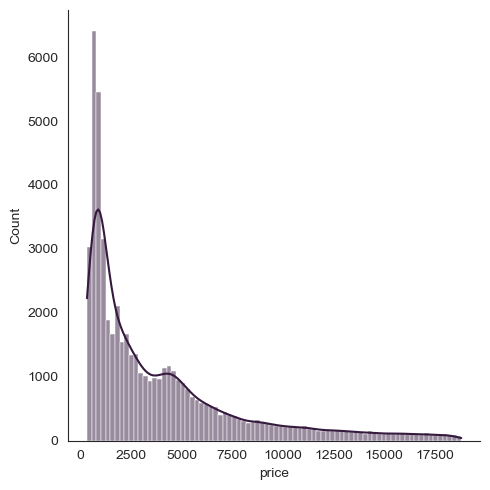

In [69]:
sns.displot(data=diaDubClean, x='price', kde=True)

In [70]:
def logTransform(df, xFeature):
# We add 1 to number_of_words to make sure we don't have a null value in the column to be transformed (0-> -inf) 
    return (np.log10(1+ df[[xFeature]]))

In [71]:
logTransPrice=logTransform(diaDubClean, 'price')
diaDf['logTransPrice'] = logTransPrice
diaDf.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,logTransPrice
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,2.514548
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,2.514548
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,2.515874
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,2.525045
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,2.526339


<Axes: xlabel='logTransPrice', ylabel='Count'>

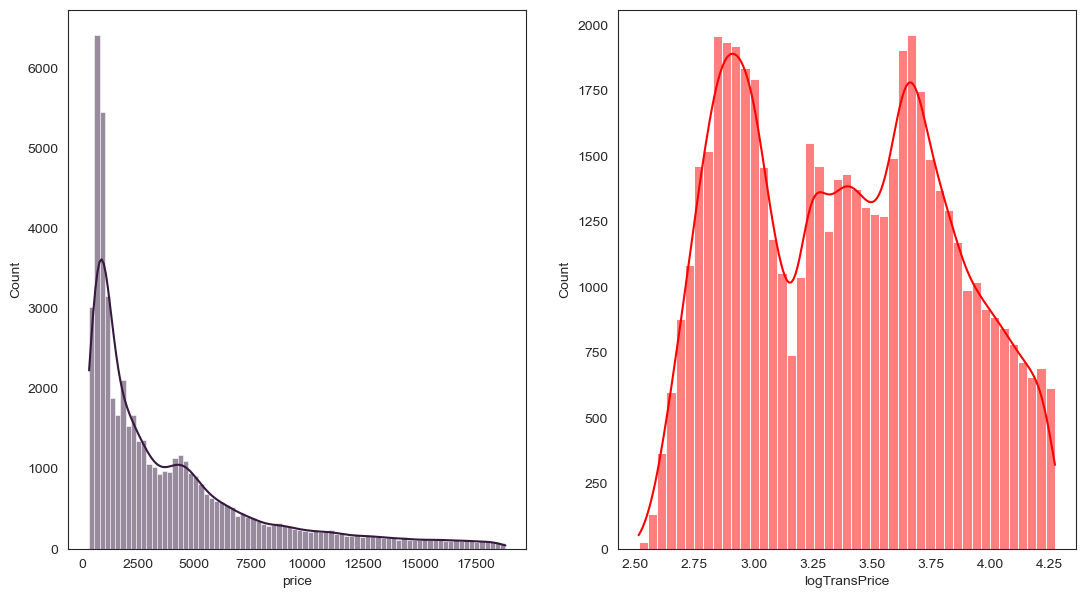

In [72]:
fig, ax = plt.subplots(1, 2, figsize=(13, 7))

sns.histplot(data=diaDubClean, x='price', kde=True, ax = ax[0])
sns.histplot(data=diaDf, x='logTransPrice', kde=True, color ="red", ax = ax[1])


<font color='darkviolet' size='4'> Box-Cox (Power) Transformations</font>
---

Another very popular transformer function is the Box-Cox function which belongs to the group of power transformers.

Power transformers are a family of parametric transformations that aim to transform any distribution of data into a data set that is normally distributed and minimize variance and skewness. [Sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.power_transform.html)


$$
y_i^{(\lambda)} =
\begin{cases}
\dfrac{y_i^\lambda-1}{\operatorname{\lambda}} , &\text{if } \lambda \neq 0 \\[12pt]
\operatorname{\ln{(y_i)}} , &\text{if } \lambda = 0
\end{cases}
$$


To achieve this flexible transformation, the Box-Cox function is defined as follows:

In [73]:
def boxCoxTransform(df, xFeature):
    return stats.boxcox(df[[xFeature]]+1, lmbda=box_cox_lambda)

In [74]:
box_cox_lambda = 0.2
bxCxPrice=boxCoxTransform(diaDubClean, 'price')
diaDf['bxCxTransPrice'] = bxCxPrice
diaDf.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,logTransPrice,bxCxTransPrice
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,2.514548,10.917672
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,2.514548,10.917672
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,2.515874,10.927396
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,2.525045,10.994806
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,2.526339,11.004343


<Axes: xlabel='bxCxTransPrice', ylabel='Count'>

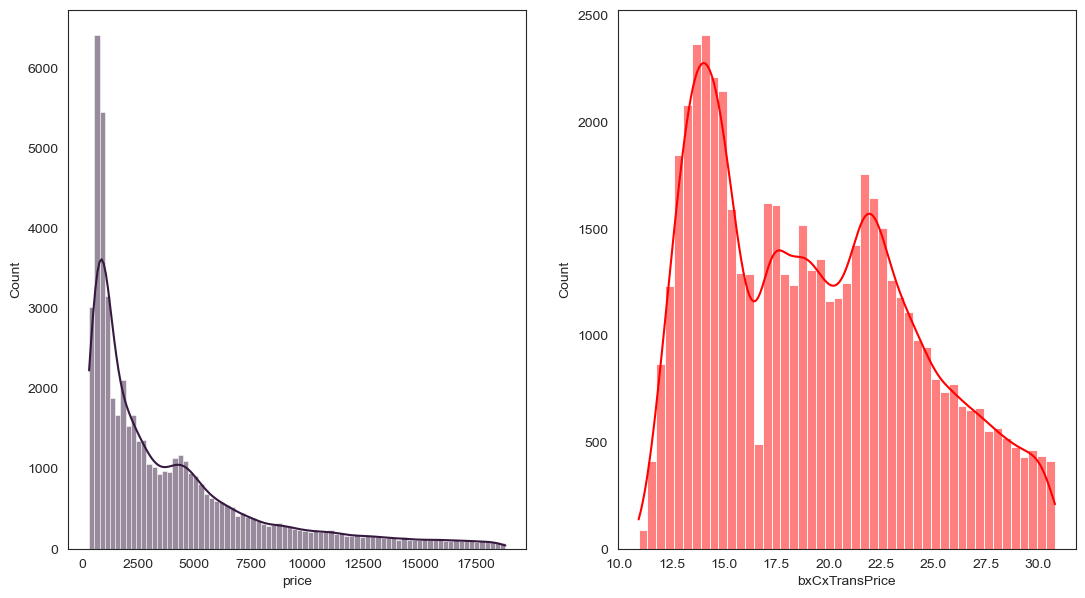

In [75]:
fig, ax = plt.subplots(1, 2, figsize=(13, 7))

sns.histplot(data=diaDubClean, x='price', kde=True, ax = ax[0])
sns.histplot(data=diaDf, x='bxCxTransPrice', kde=True, color ="red", ax = ax[1])

In [76]:
boxCoxTransPrice=logTransform(diaDubClean, 'price')
diaDf['boxCoxTransPrice'] = boxCoxTransPrice
diaDf.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,logTransPrice,bxCxTransPrice,boxCoxTransPrice
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,2.514548,10.917672,2.514548
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,2.514548,10.917672,2.514548
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,2.515874,10.927396,2.515874
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,2.525045,10.994806,2.525045
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,2.526339,11.004343,2.526339


<Axes: xlabel='boxCoxTransPrice', ylabel='Count'>

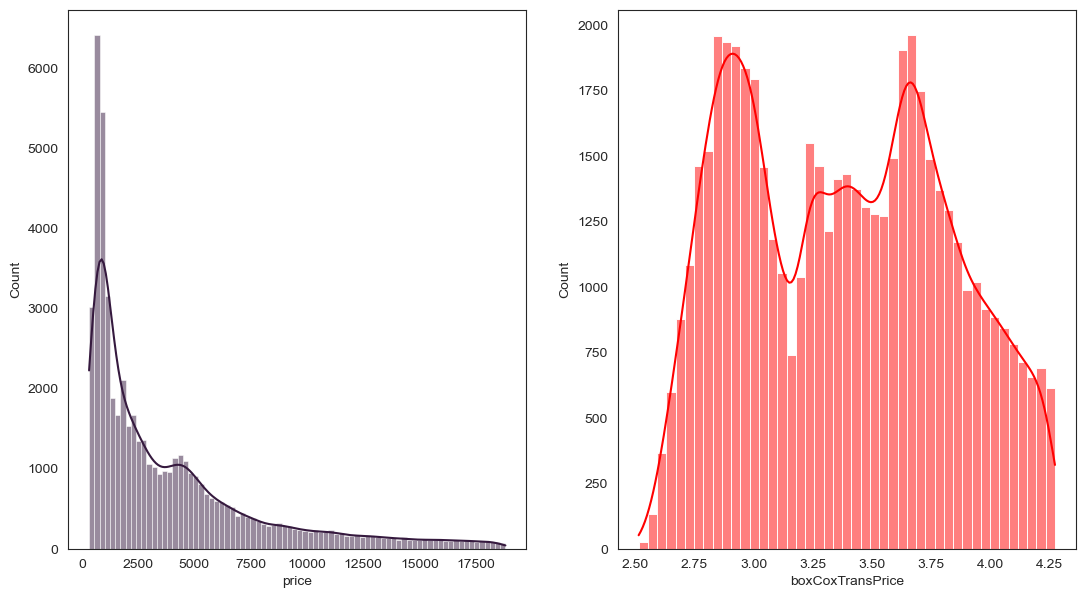

In [77]:
fig, ax = plt.subplots(1, 2, figsize=(13, 7))

sns.histplot(data=diaDubClean, x='price', kde=True, ax = ax[0])
sns.histplot(data=diaDf, x='boxCoxTransPrice', kde=True, color ="red", ax = ax[1])


<font color='maroon' size='5'>Feature Scaling</font>
---

Feature scaling in machine learning is one of the most critical steps during the pre-processing of data before creating a machine learning model. Scaling can make a difference between a weak machine learning model and a better one. The most common techniques of feature scaling are Normalization and Standardization. 
- Normalization is used when we want to bound our values between two numbers, typically, between **[0,1]** or **[-1,1]** 
- Standardization transforms the data to have **zero mean** and a **variance of 1**, they make our data unitless. Refer to the below diagram, which shows how data looks after scaling in the X-Y plane.



<img src="lggVP.png"  width="75%" height="75%"> 

----

- They can help algorithms to converge faster and can even increase the model accuracy.
- Feature scaling refers to procedures used to standardize these independent or feature variables so that they are mapped onto same scales.
- Most of the ML algorithms perform well when the feature variables are mapped onto the same scale. They don’t perform well when features are mapped onto different scales. For example, in stochastic **gradient descent**, feature scaling can improve the convergence speed of the algorithm. In support vector machines, it can reduce the time to find support vectors.
    - But, there are few exceptions as well. **Decision trees** and **random forests** are two of the algorithms where we don’t need to worry about feature scaling. These algorithms are scale invariant. Similarly, **Naive Bayes** and **Linear Discriminant Analysis** are not affected by feature scaling. In Short, any algorithm which is not distance based is not affected by feature scaling.

- http://www.faqs.org/faqs/ai-faq/neural-nets/part2/section-16.html

<font color='darkviolet' size='4'>MinMax Scaling</font>
---

The popular option is **MinMax Scaling** or **MinMax Normalization**, refers to the rescaling of the features to a range of [0, 1], which is a special case of MinMax scaling. So, in this technique, values are shifted and rescaled so that they end up ranging from zero to one. We do this by subtracting the minimum value ($x_{min}$ ) and dividing by the maximum value ($x_{max}$) minus the minimum value ($x_{min}$). 

Mathematically, **MinMax Scaling** can be expressed by the following equation: 

$$ \large x_{norm}=\frac{x-x_{min}}{x_{max}-x_{min}} $$



	
Scikit-Learn provides a transformer called **`MinMaxScaler`** for this task. It has a feature range parameter to adjust the range of values. This estimator fit and transform each feature variable individually such that it is in the given range (between zero and one) on the training set. 

**`MinMaxScaler`** works well for the cases when the distribution is not normal or when the standard deviation is very small. But, it has one drawback. It is sensitive to outliers


The syntax for implementing min-max scaling procedure in Scikit-Learn is given as follows:- 


`from sklearn.preprocessing import MinMaxScaler`

`ms = MinMaxScaler()`

`X_train_ms = ms.fit_transform(X_train)`

`X_test_ms = ms.transform(X_test)`


In [78]:
# Create sample dataset to demonstrate minmaxscaling

dfRnd = pd.DataFrame({
    # positive skew
    'x1': np.random.chisquare(10, 100),
    # negative skew 
    'x2': np.random.beta(10, 2, 100) * 40,
    # no skew
    'x3': np.random.normal(50, 3, 100)})
dfRnd.head(3)

,x1,x2,x3
0,7.715305,37.955532,48.606783
1,14.580466,28.984541,45.312262
2,2.660502,28.866406,46.963337


In [79]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
scaledDfRnd = mms.fit_transform(dfRnd)
scaledDfRnd = pd.DataFrame(scaledDfRnd, columns=['x1', 'x2', 'x3'])
scaledDfRnd.head(3)

,x1,x2,x3
0,0.168877,0.925674,0.418488
1,0.398237,0.453664,0.215618
2,0.000000,0.447448,0.317288


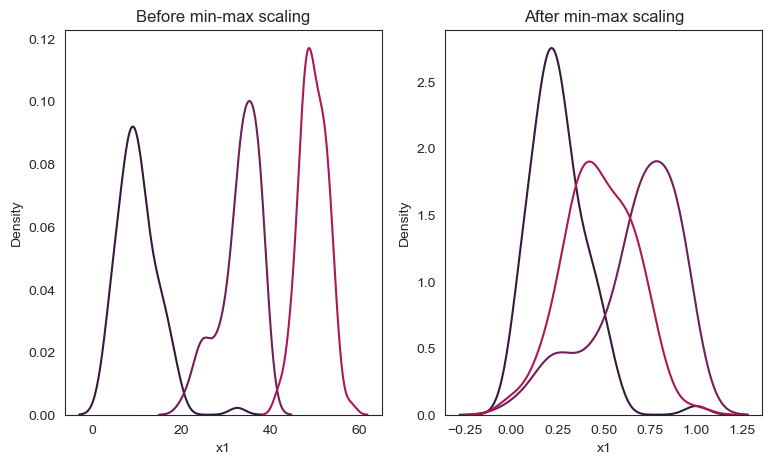

In [80]:
# Plot and visualize the results

fig,(ax1, ax2) = plt.subplots(ncols = 2, figsize = (9,5))

ax1.set_title('Before min-max scaling')
sns.kdeplot(dfRnd['x1'], ax=ax1)
sns.kdeplot(dfRnd['x2'], ax=ax1)
sns.kdeplot(dfRnd['x3'], ax=ax1)

ax2.set_title('After min-max scaling')
sns.kdeplot(scaledDfRnd['x1'], ax=ax2)
sns.kdeplot(scaledDfRnd['x2'], ax=ax2)
sns.kdeplot(scaledDfRnd['x3'], ax=ax2)

plt.show()

We can see that the skewness of the distributions are maintained. But, now the three distributions are brought onto the same scale such that they overlap.

----


As with all the other transformers, we fit this transformer to the training data only, not to the full data set (including the test set). Only then we can use them to transform the training set and the test set and new data.

<Axes: ylabel='Density'>

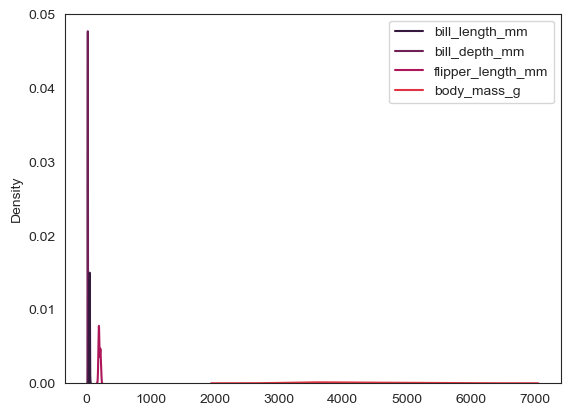

In [81]:
penNumDf = penCleanDf.select_dtypes(include=np.number)
sns.kdeplot(data=penNumDf)

In [82]:
penNumDf.columns

Index(['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g'], dtype='object')

In [83]:
penNumDf.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
4,36.7,19.3,193.0,3450.0
5,39.3,20.6,190.0,3650.0


In [84]:
mms = MinMaxScaler()
mmsPen = mms.fit_transform(penNumDf)
mmsPenDf =  pd.DataFrame(
    mmsPen, columns=['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
)
mmsPenDf.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,0.254545,0.666667,0.152542,0.291667
1,0.269091,0.511905,0.237288,0.305556
2,0.298182,0.583333,0.389831,0.152778
3,0.167273,0.738095,0.355932,0.208333
4,0.261818,0.892857,0.305085,0.263889


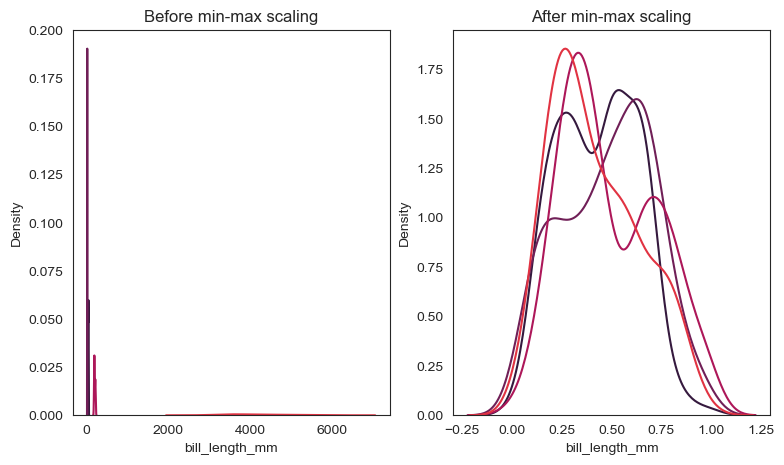

In [85]:
# Plot and visualize the results

fig,(ax1, ax2) = plt.subplots(ncols = 2, figsize = (9,5))

ax1.set_title('Before min-max scaling')
sns.kdeplot(penNumDf['bill_length_mm'], ax=ax1)
sns.kdeplot(penNumDf['bill_depth_mm'], ax=ax1)
sns.kdeplot(penNumDf['flipper_length_mm'], ax=ax1)
sns.kdeplot(penNumDf['body_mass_g'], ax=ax1)

ax2.set_title('After min-max scaling')
sns.kdeplot(mmsPenDf['bill_length_mm'], ax=ax2)
sns.kdeplot(mmsPenDf['bill_depth_mm'], ax=ax2)
sns.kdeplot(mmsPenDf['flipper_length_mm'], ax=ax2)
sns.kdeplot(mmsPenDf['body_mass_g'], ax=ax2)
plt.show()

<font color='darkviolet' size='4'>Standard Scaler (Normalization)</font>
---

**standardization**, can be more useful for many ML algorithms, especially for optimization algorithms such as gradient descent.


In **standardization**, first we determine the distribution mean and standard deviation for each feature. Next we subtract the mean from each feature. Then we divide the values of each feature by its standard deviation. So, in standardization, we center the feature columns at **mean 0** with **standard deviation 1** so that the feature columns takes the form of a normal distribution, which makes it easier to learn the weights.


Mathematically, **standardization** can be expressed by the following equation: 


The simplest transformation is Standard Scaling (or z-score normalization):

$$ \large z= \frac{x-\mu}{\sigma} $$

Note that Standard Scaling does not make the distribution normal in the strict sense.

$!$
**MinMax scaling** scales the data to a limited range of values. Unlike MinMax scaling, standardization does not bound values to a specific range. So, standardization is much less affected by outliers. Standardization maintains useful information about outliers and is much less affected by them. It makes the algorithm less sensitive to outliers in contrast to MinMax scaling. 

Scikit-Learn provides a transformer called **`StandardScaler`** for standardization. The **`StandardScaler`** transformer assumes that the data is normally distributed within each feature and it will scale them such that the distribution is centered around 0 and and have a standard deviation of 1.

The syntax to implement standardization given as follows :-


`from sklearn.preprocessing import StandardScaler`

`ss = StandardScaler()`

`X_train_ss = ss.fit_transform(X_train)`

`X_test_ss = ss.transform(X_test)`




In [86]:
# Create sample dataset to demonstrate standardization
np.random.seed(1)
dfRndN = pd.DataFrame({
            'x1':np.random.normal(0, 10, 10000),
            'x2':np.random.normal(10, 20, 10000),
            'x3':np.random.normal(-10, 10, 10000)})

In [87]:
# Use StandardScaler to apply Standardisation
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
scaledDfRndN = ss.fit_transform(dfRndN)
scaledDfRndN = pd.DataFrame(scaledDfRndN, columns = ['x1', 'x2', 'x3'])

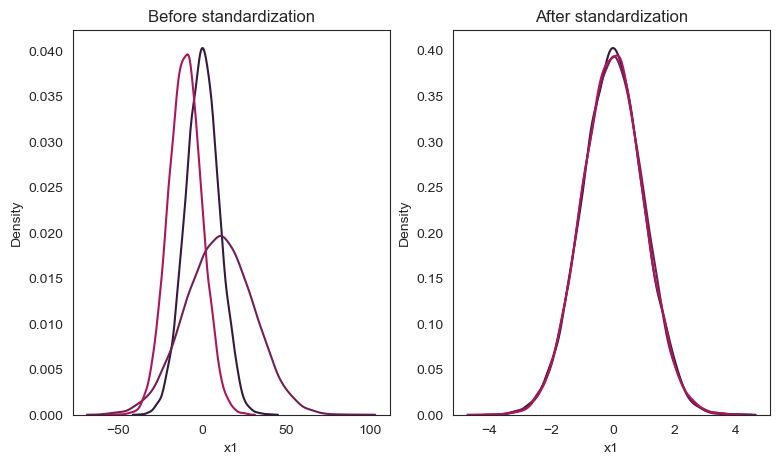

In [88]:
# Plot and visualize the results

fig,(ax1, ax2) = plt.subplots(ncols = 2, figsize = (9,5))

ax1.set_title('Before standardization')
sns.kdeplot(dfRndN['x1'], ax=ax1)
sns.kdeplot(dfRndN['x2'], ax=ax1)
sns.kdeplot(dfRndN['x3'], ax=ax1)

ax2.set_title('After standardization')
sns.kdeplot(scaledDfRndN['x1'], ax=ax2)
sns.kdeplot(scaledDfRndN['x2'], ax=ax2)
sns.kdeplot(scaledDfRndN['x3'], ax=ax2)

plt.show()


In [89]:
ss = StandardScaler()
ssPen = ss.fit_transform(penNumDf)
ssPenDf =  pd.DataFrame(
    ssPen, columns=['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
)
ssPenDf.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,-0.896042,0.780732,-1.426752,-0.568475
1,-0.822788,0.119584,-1.069474,-0.506286
2,-0.676280,0.424729,-0.426373,-1.190361
3,-1.335566,1.085877,-0.569284,-0.941606
4,-0.859415,1.747026,-0.783651,-0.692852


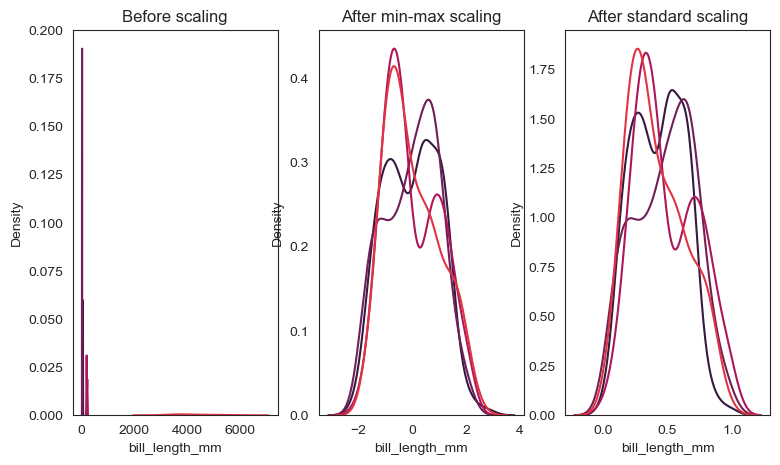

In [90]:

fig,(ax1, ax2, ax3) = plt.subplots(ncols = 3, figsize = (9,5))

ax1.set_title('Before scaling')
sns.kdeplot(penNumDf['bill_length_mm'], ax=ax1)
sns.kdeplot(penNumDf['bill_depth_mm'], ax=ax1)
sns.kdeplot(penNumDf['flipper_length_mm'], ax=ax1)
sns.kdeplot(penNumDf['body_mass_g'], ax=ax1)

ax2.set_title('After min-max scaling')
sns.kdeplot(ssPenDf['bill_length_mm'], ax=ax2)
sns.kdeplot(ssPenDf['bill_depth_mm'], ax=ax2)
sns.kdeplot(ssPenDf['flipper_length_mm'], ax=ax2)
sns.kdeplot(ssPenDf['body_mass_g'], ax=ax2)

ax3.set_title('After standard scaling')
sns.kdeplot(mmsPenDf['bill_length_mm'], ax=ax3)
sns.kdeplot(mmsPenDf['bill_depth_mm'], ax=ax3)
sns.kdeplot(mmsPenDf['flipper_length_mm'], ax=ax3)
sns.kdeplot(mmsPenDf['body_mass_g'], ax=ax3)
plt.show()

$!$
As we can see, all the features are now on the same scale relative to one another. 

We should fit the **`StandardScaler`** class only once on the training data set and use those parameters to transform the test set or new data set. 

So, we can **standardize** the training dataset and use the same mean and standard deviation to **standardize** the test dataset.


**StandardScaling** and **MinMax Scaling** have similar applications and are often more or less interchangeable. However, if the algorithm involves the calculation of distances between points or vectors, the default choice is **StandardScaling**. But **MinMax Scaling** is useful for visualization by bringing features within the interval (0, 255).

If we assume that some data is not normally distributed but is described by the [log-normal distribution](https://en.wikipedia.org/wiki/Log-normal_distribution), it can easily be transformed to a normal distribution:

<font color='darkviolet' size='4'>MaxAbsScaler Scaler</font>
---

In this feature rescaling task, we rescale each feature by its maximum absolute value. So, the maximum absolute value of each feature in the training set will be 1.0. It does not affect the data and hence there is no effect on sparsity.

Mathematically, **MaxAbsScaler** can be expressed by the following equation: 

$$ \large x_{scaled}=\frac{x}{|x_{max}|} $$

Scikit-Learn provides **MaxAbsScaler** transformer for this task.

The syntax for implementing max-abs scaling procedure in Scikit-Learn is given as follows:- 


`from sklearn.preprocessing import MaxAbsScaler`

`mabs = MaxAbsScaler()`

`X_train_mabs = mabs.fit_transform(X_train)`

`X_test_mabs = mabs.transform(X_test)`


In [91]:
# Create sample dataset to demonstrate maxabsscaling

dfRnd = pd.DataFrame({
    # positive skew
    'x1': np.random.chisquare(10, 1000),
    # negative skew 
    'x2': np.random.beta(10, 2, 1000) * 40,
    # no skew
    'x3': np.random.normal(50, 3, 1000)})
dfRnd.head(3)

,x1,x2,x3
0,11.102613,32.901398,54.509849
1,7.338586,28.670792,52.473472
2,22.764407,31.889750,48.803613


In [92]:
# Use MaxAbsScaler to apply maxabsscaling

from sklearn.preprocessing import MaxAbsScaler
mabs = MaxAbsScaler()
scaledDfRnd = mabs.fit_transform(dfRnd)
scaledDfRnd = pd.DataFrame(scaledDfRnd, columns=['x1', 'x2', 'x3'])
scaledDfRnd.head(3)

,x1,x2,x3
0,0.384105,0.825861,0.916826
1,0.253885,0.719669,0.882575
2,0.787556,0.800468,0.820850


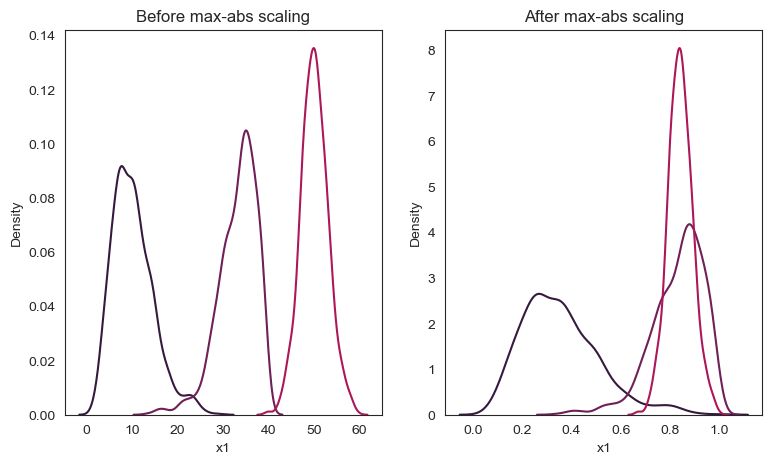

In [93]:
# Plot and visualize the results

fig,(ax1, ax2) = plt.subplots(ncols = 2, figsize = (9,5))

ax1.set_title('Before max-abs scaling')
sns.kdeplot(dfRnd['x1'], ax=ax1)
sns.kdeplot(dfRnd['x2'], ax=ax1)
sns.kdeplot(dfRnd['x3'], ax=ax1)

ax2.set_title('After max-abs scaling')
sns.kdeplot(scaledDfRnd['x1'], ax=ax2)
sns.kdeplot(scaledDfRnd['x2'], ax=ax2)
sns.kdeplot(scaledDfRnd['x3'], ax=ax2)

plt.show()

$!$ **MaxAbsScaler** results in the feature variables being rescaled by their maximum absolute value.

<font color='darkviolet' size='4'>Robust Scaler</font>
---


**`StandardScaler`** can often give misleading results when the **data contain outliers**.  Outliers can often influence the sample mean and variance and hence give misleading results. In such cases, it is better to use a scalar that is robust against outliers. Scikit-Learn provides a transformer called **`RobustScaler`** for this purpose.


The **`RobustScaler`** is very similar to **`MinMaxScaler`**. The difference lies in the parameters used for scaling. 
While **`MinMaxScaler`** uses minimum and maximum values for rescaling, **`RobustScaler`** uses interquartile(IQR) range 
for the same.



Mathematically, the new value x(i) can be calculated as follows:-

 
 $$  x(i) = \frac{x_i - Q1(x)}{Q3(x) - Q1(x)} $$
 
             
	
Here, $x(i)$ is the scaled value, $x_i$ is a particular sample value, $Q1(x)$ and $Q3(x)$ are the 1st quartile (25th quantile) and 
3rd quartile (75th quantile) respectively. So, $Q3(x) - Q1(x)$ is the difference between 3rd quartile (75th quantile) and 
1st quartile (25th quantile) respectively. It is called $IQR$ (Interquartile Range).

	

The syntax for implementing scaling using RobustScaler in Scikit-Learn is given as follows:- 


`from sklearn.preprocessing import RobustScaler`

`rb = RobustScaler()`

`X_train_rb = rb.fit_transform(X_train)`

`X_test_rb = rb.transform(X_test)`


In [94]:
# Create sample dataset to demonstrate scaling using RobustScaler

dfNrm = pd.DataFrame({
    # Distribution with lower outliers
    'x1': np.concatenate([np.random.normal(20, 1, 1000), np.random.normal(1, 1, 25)]),
    # Distribution with higher outliers
    'x2': np.concatenate([np.random.normal(30, 1, 1000), np.random.normal(50, 1, 25)]),
})

In [95]:
# Use RobustScaler for scaling

from sklearn.preprocessing import RobustScaler
rb = RobustScaler()
robustScaledDfNrm = rb.fit_transform(dfNrm)
robustScaledDfNrm = pd.DataFrame(robustScaledDfNrm, columns=['x1', 'x2'])

# Use MinMaxScaler for Normalization
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()
minmaxScaledDfNrm = ms.fit_transform(dfNrm)
minmaxScaledDfNrm = pd.DataFrame(minmaxScaledDfNrm, columns=['x1', 'x2'])

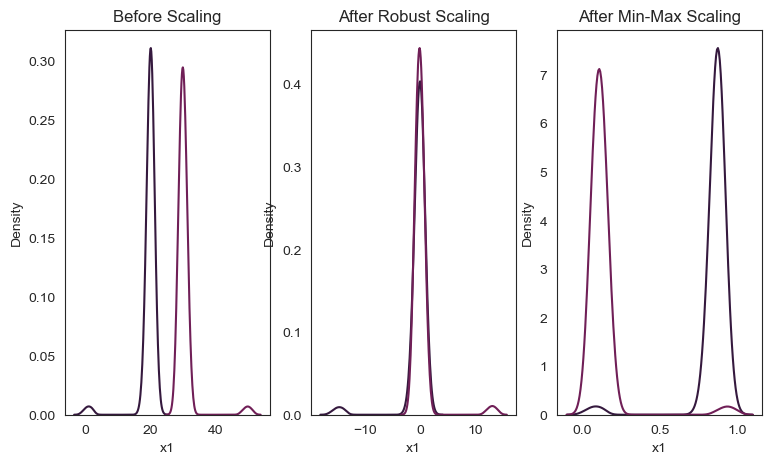

In [96]:
# Plot and visualize the results

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(9, 5))

ax1.set_title('Before Scaling')
sns.kdeplot(dfNrm['x1'], ax=ax1)
sns.kdeplot(dfNrm['x2'], ax=ax1)

ax2.set_title('After Robust Scaling')
sns.kdeplot(robustScaledDfNrm['x1'], ax=ax2)
sns.kdeplot(robustScaledDfNrm['x2'], ax=ax2)

ax3.set_title('After Min-Max Scaling')
sns.kdeplot(minmaxScaledDfNrm['x1'], ax=ax3)
sns.kdeplot(minmaxScaledDfNrm['x2'], ax=ax3)

plt.show()

$!$We can see that, **`RobustScaler`** transform the distributions to brought them onto the same scale.The distributions actually overlap each other. The outliers remain outside the range of the new distributions. 

In **`MinMaxScaler`**, the two normal distributions are kept separate by the outliers that are inside the range of 0 and 1.

In [97]:
from sklearn.preprocessing import RobustScaler
rb = RobustScaler()
robustScaledDfNrm = rb.fit_transform(dfNrm)
robustScaledDfNrm = pd.DataFrame(robustScaledDfNrm, columns=['x1', 'x2'])


In [98]:
rs = RobustScaler()
rsPen = rs.fit_transform(penNumDf)
rsPenDf =  pd.DataFrame(
    rsPen, columns=['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
)
rsPenDf.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,-0.593407,0.451613,-0.695652,-0.244898
1,-0.549451,0.032258,-0.478261,-0.204082
2,-0.461538,0.225806,-0.086957,-0.653061
3,-0.857143,0.645161,-0.173913,-0.489796
4,-0.571429,1.064516,-0.304348,-0.326531


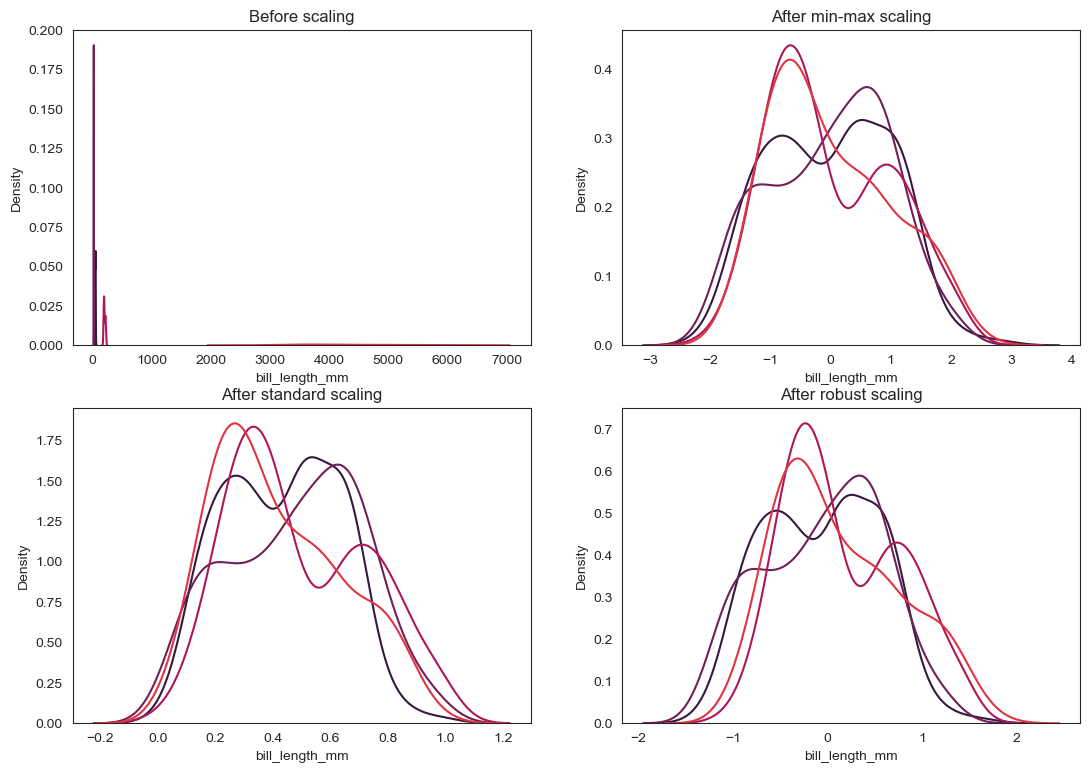

In [99]:

fig, axs = plt.subplots(2,2, figsize = (13,9))

axs[0,0].set_title('Before scaling')
sns.kdeplot(penNumDf['bill_length_mm'], ax=axs[0,0])
sns.kdeplot(penNumDf['bill_depth_mm'], ax=axs[0,0])
sns.kdeplot(penNumDf['flipper_length_mm'], ax=axs[0,0])
sns.kdeplot(penNumDf['body_mass_g'], ax=axs[0,0])


axs[0,1].set_title('After min-max scaling')
sns.kdeplot(ssPenDf['bill_length_mm'], ax=axs[0,1])
sns.kdeplot(ssPenDf['bill_depth_mm'], ax=axs[0,1])
sns.kdeplot(ssPenDf['flipper_length_mm'], ax=axs[0,1])
sns.kdeplot(ssPenDf['body_mass_g'], ax=axs[0,1])


axs[1,0].set_title('After standard scaling')
sns.kdeplot(mmsPenDf['bill_length_mm'], ax=axs[1,0])
sns.kdeplot(mmsPenDf['bill_depth_mm'], ax=axs[1,0])
sns.kdeplot(mmsPenDf['flipper_length_mm'], ax=axs[1,0])
sns.kdeplot(mmsPenDf['body_mass_g'], ax=axs[1,0])


axs[1,1].set_title('After robust scaling')
sns.kdeplot(rsPenDf['bill_length_mm'], ax=axs[1,1])
sns.kdeplot(rsPenDf['bill_depth_mm'], ax=axs[1,1])
sns.kdeplot(rsPenDf['flipper_length_mm'], ax=axs[1,1])
sns.kdeplot(rsPenDf['body_mass_g'], ax=axs[1,1])

plt.show()

<font color='darkviolet' size='4'>Normalizing</font>
---

In this feature scaling task, we rescale each observation to a **length of 1** (a unit norm). Scikit-Learn provides, the **Normalizer** class for this task. In this task, we scale the components of a feature vector such that the complete vector 
has length one. 


This usually means dividing each component by the Euclidean length (magnitude) of the vector.


Mathematically, **normalization** can be expressed by the following equation: 


$$ \large x_{norm}=\frac{x_i}{|x_{i}|} $$

$|x_{i}|$ is the Euclidean length of the vector. 

The syntax for implementing in Scikit-Learn is given as follows:- 

`from sklearn.preprocessing import Normalizer`

`nm = Normalizer()`

`X_train_nm = nm.fit_transform(X_train)`

`X_test_nm = nm.transform(X_test)`


In [100]:
from mpl_toolkits.mplot3d import Axes3D

In [101]:
dfRndInt = pd.DataFrame({
    'x1': np.random.randint(-100, 100, 1000).astype(float),
    'y1': np.random.randint(-80, 80, 1000).astype(float),
    'z1': np.random.randint(-150, 150, 1000).astype(float),})

In [102]:
from sklearn.preprocessing import Normalizer
nm = Normalizer()
scaledDfRndInt = nm.fit_transform(dfRndInt)
scaledDfRndInt = pd.DataFrame(scaledDfRndInt, columns= ['x1', 'y1', 'z1'])

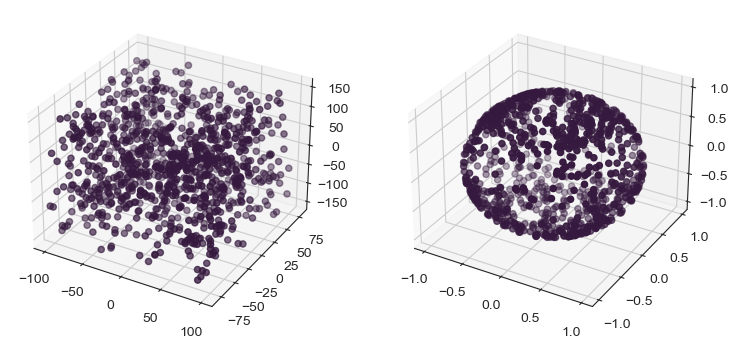

In [103]:
fig = plt.figure(figsize=(9, 5))

ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122, projection='3d')

ax1.scatter(dfRndInt['x1'], dfRndInt['y1'], dfRndInt['z1'])
ax2.scatter(scaledDfRndInt['x1'], scaledDfRndInt['y1'], scaledDfRndInt['z1'])

plt.show()

<font color='darkviolet' size='4'>Binarizing</font>
---

In this feature scaling procedure, we binarize the data (set feature values equal to 0 or 1) according to a threshold. 
So, using a binary threshold, we transform our data by marking the values above it to 1 and those equal to or below it to 0. 


Scikit-Learn provides **Binarizer** class for this purpose. The syntax for binarizing the data follow the same rules as above and is given below:-


`from sklearn.preprocessing import Binarizer`

`binr = Binarizer()`

`X_train_binr = binr.fit_transform(X_train)`

`X_test_binr = binr.transform(X_test)`


-----




In [104]:
# Create sample dataset to demonstrate binarization 
dat = [[2, -2, 1],
        [5, -5, 3],
        [1, 0, -1]]

dfDat = pd.DataFrame(dat, columns = ['x1', 'x2', 'x3'])
dfDat

,x1,x2,x3
0,2,-2,1
1,5,-5,3
2,1,0,-1


In [105]:
# Use Binarizer to apply binarization

from sklearn.preprocessing import Binarizer
_dfDat=dfDat.copy()
binr = Binarizer(threshold=0, copy=False)
scaledDfDat = binr.fit_transform(_dfDat)
scaledDfDat = pd.DataFrame(scaledDfDat, columns = ['x1', 'x2', 'x3'])
scaledDfDat

,x1,x2,x3
0,1,0,1
1,1,0,1
2,1,0,0


$!$
We can see that the dataframe dfDat values are converted into binary values of 0 or 1 according to the threshold of 0.

In [106]:
# Create sample dataset to demonstrate binarization 
dat = [[2, -2, 1],
        [5, -5, 3],
        [1, 0, -1]]

dfDat = pd.DataFrame(dat, columns = ['x1', 'x2', 'x3'])
dfDat
binr = Binarizer(threshold=2, copy=False)
col = dfDat['x1'].values.reshape(-1,1)
print(col)
binr.fit_transform(col)

[[2]
 [5]
 [1]]


array([[0],
       [1],
       [0]], dtype=int64)

<font color='darkviolet' size='4'>Mean removal with scale</font>
---

In this feature scaling task, we remove the mean from each feature **to centre it on zero**. Thus, we standardize a dataset 
along any axis. Scikit-Learn provides **`scale`** class for this purpose. 


The syntax for this purpose is given below:-


`from sklearn.preprocessing import scale`

`scl = scale()`

`X_train_scl = scl.fit_transform(X_train)`

`X_test_scl = scl.transform(X_test)`


In [107]:
# Create sample dataset to demonstrate standardization using scale

mat = [[5, -5, 1],
        [2, -2, 3],
        [1, 0, -1]]

dfMat = pd.DataFrame(mat, columns = ['x4', 'x5', 'x6'])
dfMat

,x4,x5,x6
0,5,-5,1
1,2,-2,3
2,1,0,-1


In [108]:
# Use scale to apply standardization

from sklearn.preprocessing import scale
scaledDfMat = scale(dfMat)
scaledDfMat

array([[ 1.37281295, -1.29777137,  0.        ],
       [-0.39223227,  0.16222142,  1.22474487],
       [-0.98058068,  1.13554995, -1.22474487]])

$!$ The dataset is now standardized along axis = 0. So, the feature variables are now standardized independently.

In [109]:
# The scaled data has zero mean

(scaledDfMat.mean(axis = 0).astype(int))

array([0, 0, 0])

In [110]:
# The scaled data has unit variance

(scaledDfMat.std(axis = 0))

array([1., 1., 1.])

$!$ We can see that the scaled data has zero mean and unit variance.

<font color='maroon' size='5'>Feature Selection</font>
---
----

Why would it even be necessary to select features? To some, this idea may seem counterintuitive, but there are at least two important reasons to get rid of unimportant features. The first is clear to every engineer: the more data, the higher the computational complexity. As long as we work with toy datasets, the size of the data is not a problem, but, for real loaded production systems, hundreds of extra features will be quite tangible. The second reason is that some algorithms take noise (non-informative features) as a signal and overfit.

**1. Filter Methods**

**2. Wrapper Methods**

**3. Embedded Methods**



<font color='maroon' size='4'>Filter Methods</font>
---
----

   - Basic Methods: Remove low variance (quasi-constant) features
   - Univariate Selection Methods
       - Information Gain
       - Fisher Score (chi-square implementation)
       - ANOVA F-value for Feature Selection
   - Correlation-Matrix with Heatmap

<font color='darkviolet' size='4'>Removing features with low variance</font>
---

`from sklearn.feature_selection import VarianceThreshold`

- It removes all features whose variance doesn’t meet some threshold. By default, it removes all zero-variance features, i.e. features that have the same value in all samples.


As an example, suppose that we have a dataset with boolean features, and we want to remove all features that are either **1** or **0** (on or off) in more than 80% of the samples. Boolean features are Bernoulli random variables, and the variance of such variables is given by
    $$Var(X) = p(1-p)$$
so we can select using the threshold:  $0.8 * (1 - 0.8)$:

In [111]:
from sklearn.feature_selection import VarianceThreshold
X = [[0, 0, 1], [0, 1, 0], [1, 0, 0], [0, 1, 1], [0, 1, 0], [0, 1, 1]]
sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
sel.fit_transform(X)

array([[0, 1],
       [1, 0],
       [0, 0],
       [1, 1],
       [1, 0],
       [1, 1]])

In [112]:
XPen.head(5)

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Torgersen,39.3,20.6,190.0,3650.0,Male


In [113]:
le = LabelEncoder()
# Use the trained LabelEncoder to label the education column
XPen['island'] = le.fit_transform(XPen['island'])
XPen['sex'] = le.fit_transform(XPen['sex'])
print(XPen.shape)
XPen.head(5)

(333, 6)


,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,2,39.1,18.7,181.0,3750.0,1
1,2,39.5,17.4,186.0,3800.0,0
2,2,40.3,18.0,195.0,3250.0,0
4,2,36.7,19.3,193.0,3450.0,0
5,2,39.3,20.6,190.0,3650.0,1


In [114]:
VarianceThreshold(0.5).fit_transform(XPen).shape

(333, 5)

In [115]:
VarianceThreshold(0.9).fit_transform(XPen).shape

(333, 4)

<font color='darkviolet' size='4'> Univariate feature selection</font>
---


Univariate feature selection works by selecting the best features based on univariate statistical tests. It can be seen as a preprocessing step to an estimator. `Scikit-learn` exposes feature selection routines as objects that implement the transform method:

- **SelectKBest** removes all but the $k$ highest scoring features

- **SelectPercentile** removes all but a user-specified highest scoring percentage of features
    - using common univariate statistical tests for each feature: false positive rate SelectFpr, false discovery rate SelectFdr, or family wise error SelectFwe.

- **GenericUnivariateSelect** allows to perform univariate feature selection with a configurable strategy. This allows to select the best univariate selection strategy with hyper-parameter search estimator.

---


These objects take as input a scoring function that returns univariate scores and p-values (or only scores for `SelectKBest` and `SelectPercentile`):

- **For regression:** r_regression, f_regression, mutual_info_regression

- **For classification:** chi2, f_classif, mutual_info_classif

The methods based on F-test estimate the degree of linear dependency between two random variables. On the other hand, mutual information methods can capture any kind of statistical dependency, but being nonparametric, they require more samples for accurate estimation. 

- Note that the $\chi^2-test$ should only be applied to non-negative features, such as frequencies.

<font color='darkviolet' size='4'>Information Gain </font>

---

Information gain or mutual information (MI) measures how much information the presence/absence of a feature contributes to making the correct prediction on the target.



- **mutual_info_regression**

    - Estimate mutual information for a continuous target variable.

- **mutual_info_classif**

    - It estimates mutual information for a discrete target variable.


<font color='darkviolet' size='4'>Fisher Score (chi-square implementation)</font>

---



- Chi-square implementation in scikit-learn computes chi-squared stats between each non-negative feature and class.

This score should be used to evaluate categorical variables in a classification task. It compares the observed distribution of the different classes of target Y among the different categories of the feature, against the expected distribution of the target classes, regardless of the feature categories.

In [116]:
# Load packages
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
  
# Load iris data
irisDf = load_iris()
  
# Create features and target
X = irisDf.data
y = irisDf.target
  
# Convert to categorical data by converting data to integers
X = X.astype(int)
  
# Two features with highest chi-squared statistics are selected
chi2Features = SelectKBest(chi2, k = 2)
XKbestFeatures = chi2Features.fit_transform(X, y)
  
# Reduced features
print('Original feature number:', X.shape[1])
print('Reduced feature number:', XKbestFeatures.shape[1])

Original feature number: 4
Reduced feature number: 2


Once we fit the model information on feature importance will be available in the fitted model. 

In [117]:
XFeatureSelector = chi2Features.fit(X, y)
featScores = pd.DataFrame()
featScores["Chi2 Score"] = XFeatureSelector.scores_
featScores["P Values"] =  XFeatureSelector.pvalues_
featScores["Support"] = XFeatureSelector.get_support()
featScores

,Chi2 Score,P Values,Support
0,10.287129,5.836848e-03,False
1,5.022670,8.115982e-02,False
2,133.068548,1.272131e-29,True
3,74.279070,7.421726e-17,True


<font color='darkviolet' size='4'>ANOVA F-value</font>

---



Compute the ANOVA F-value for the provided sample.

- if the features are **categorical**, we will calculate a **chi-square statistic** between each feature and the target vector. 
- if the features are **quantitative**, we will compute the **ANOVA F-value** between each feature and the target vector.



In [118]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

#XPen, yPen
XPenNew = SelectKBest(f_classif, k=2).fit_transform(XPen, yPen)
# Reduced features
print('Original feature number:', XPen.shape)
print('Reduced feature number:', XPenNew.shape)


Original feature number: (333, 6)
Reduced feature number: (333, 2)


<font color='darkviolet' size='4'>Correlation-Matrix with Heatmap</font>
---

---

- Correlation is a measure of the linear relationship of 2 or more variables. Through correlation, we can predict one variable from the other.

- Good variables are highly correlated with the target.

- Correlated predictor variables provide redundant information.

- **Variables should be correlated with the target but uncorrelated among themselves.**

- Correlation Feature Selection evaluates subsets of features on the basis of the following hypothesis:

    - **"Good feature subsets contain features highly correlated with the target, yet uncorrelated to each other".**


- If the correlation between two features is 0 this means that changing any of these two features will not affect the other.

- If the correlation between two features is greater than 0 this means that increasing the values in one feature will make increase also the values in the other feature (the closer the correlation coefficient is to 1 and the stronger is going to be this bond between the two different features).

- If the correlation between two features is less than 0 this means that increasing the values in one feature will make decrease the values in the other feature (the closer the correlation coefficient is to -1 and the stronger is going to be this relationship between the two different features).

- In this analysis we will check if the selected variables are highly correlated with each other. If they are, we would then need to keep just one of the correlated ones and drop the others.

In [119]:
df.head()

,CityName,Target
0,0.750000,1
1,0.333333,0
2,0.500000,1
3,0.750000,1
4,1.000000,1


<Axes: >

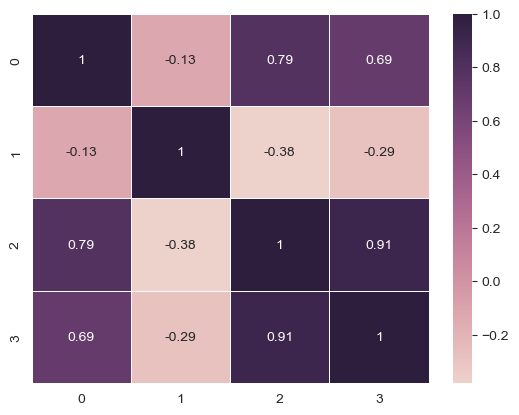

In [120]:
df = pd.DataFrame(X)
sns.heatmap(df.corr(), 
            annot=True, linewidth=.5, 
            cmap=sns.cubehelix_palette(as_cmap=True)
           )

In [121]:
 # Select upper triangle of correlation matrix
#upper = df.corr().where(np.triu(np.ones(df.corr().shape), k=1).astype(np.bool))
#upper  

In [122]:
# Find index of feature columns with correlation greater than 0.9
#drop = [column for column in upper.columns if any(upper[column] > 0.9)]
#print(drop)

In [123]:
# Drop Marked Features
#dropDf = df.drop(df.columns[drop], axis=1)
#dropDf.head()

<font color='maroon' size='4'>Wrapper Methods</font>
---
----

   - Forward Selection
   - Backward Elimination
   - Exhaustive Feature Selection
   - Recursive Feature Elimination
   - Recursive Feature Elimination with Cross-Validation

<font color='darkviolet' size='4'>Sequential Feature Selection</font>
---


Sequential Feature Selection (SFS) is available in the `SequentialFeatureSelector` transformer. SFS can be either forward or backward:

- **Forward-SFS** is a greedy procedure that iteratively finds the best new feature to add to the set of selected features. Concretely, we initially start with zero features and find the one feature that maximizes a **cross-validated score** when an estimator is trained on this single feature. Once that first feature is selected, we repeat the procedure by adding a new feature to the set of selected features. The procedure stops when the desired number of selected features is reached, as determined by the `n_features_to_select` parameter.

- **Backward-SFS** follows the same idea but works in the opposite direction: instead of starting with no features and greedily adding features, we start with all the features and greedily remove features from the set. The `direction` parameter controls whether forward or backward SFS is used.

In [124]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SequentialFeatureSelector

knn = KNeighborsClassifier(n_neighbors=4)
sfsForward = SequentialFeatureSelector(
    knn, n_features_to_select=2, direction="forward"
).fit(XPen, yPen)


In [125]:
sfsForward.feature_names_in_

array(['island', 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm',
       'body_mass_g', 'sex'], dtype=object)

In [126]:
sfsForward.get_feature_names_out()

array(['bill_length_mm', 'flipper_length_mm'], dtype=object)

In [127]:
sfsForward.get_support()

array([False,  True, False,  True, False, False])

In [128]:
sfsForward.transform(XPen).shape

(333, 2)

In [129]:
sfsBackward = SequentialFeatureSelector(
    knn, n_features_to_select=3, direction="backward"
).fit(XPen, yPen)

In [130]:
sfsBackward.get_support()

array([False,  True,  True, False, False,  True])

In [131]:

from mlxtend.feature_selection import SequentialFeatureSelector as SFS

sfsFor = SFS(knn,  
    k_features=4, 
    forward=True, 
    floating=False, 
    verbose=2,
    scoring='accuracy',
    cv=0)

sfsFor = sfsFor.fit(XPen, yPen)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s finished

[2024-03-26 02:01:37] Features: 1/4 -- score: 0.7897897897897898[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished

[2024-03-26 02:01:37] Features: 2/4 -- score: 0.963963963963964[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s finished

[2024-03-26 02:01:37] Features: 3/4 -- score: 0.975975975975976[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 ou

In [132]:
sfsFor.k_feature_idx_

(0, 1, 2, 3)

In [133]:
XPen.columns[list(sfsFor.k_feature_idx_)]

Index(['island', 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm'], dtype='object')

In [134]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

sfsBack = SFS(knn,  
    k_features=4, 
    forward=False, 
    floating=False, 
    verbose=2,
    scoring='accuracy',
    cv=0)

sfsBack = sfsBack.fit(XPen, yPen)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s finished

[2024-03-26 02:01:37] Features: 5/4 -- score: 0.9819819819819819[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished

[2024-03-26 02:01:37] Features: 4/4 -- score: 0.990990990990991

In [135]:
sfsBack.k_feature_idx_

(0, 1, 2, 5)

In [136]:
XPen.columns[list(sfsBack.k_feature_idx_)]

Index(['island', 'bill_length_mm', 'bill_depth_mm', 'sex'], dtype='object')

In general, forward and backward selection do not yield equivalent results. Also, one may be much faster than the other depending on the requested number of selected features: if we have 10 features and ask for 7 selected features, forward selection would need to perform 7 iterations while backward selection would only need to perform 3.

SFS differs from RFE and  `SelectFromModel` in that it does not require the underlying model to expose a coef_ or `feature_importances_` attribute. It may however be slower considering that more models need to be evaluated, compared to the other approaches. For example in backward selection, the iteration going from m features to $m - 1$ features using k-fold cross-validation requires fitting $m * k$ models, while RFE would require only a single fit, and `SelectFromModel` always just does a single fit and requires no iterations.

<font color='darkviolet' size='4'>Exhaustive feature selection</font>
---

- This is another greedy algorithm as it evaluates all possible feature combinations. It is quite computationally expensive, and sometimes, if feature space is big, even unfeasible.


- The best subset of features is selected, over all possible feature subsets, by optimizing a specified performance metric for a certain ML algorithm. 
    - For example, if the classifier is a logistic regression and the dataset consists of 4 features, the algorithm will evaluate all 15 feature combinations as follows:

        - all possible combinations of 1 feature
        - all possible combinations of 2 features
        - all possible combinations of 3 features
    - all the 4 features
and select the one that results in the best performance (e.g., classification accuracy) of the logistic regression classifier.



There is a special package for python that implements this type of feature selection: mlxtend.

- In the mlxtend implementation of the exhaustive feature selection, the stopping criteria is an arbitrarily set number of features. So the search will finish when we reach the desired number of selected features.

- This is somewhat arbitrary because we may be selecting a subopimal number of features, or likewise, a high number of features.

- ExhaustiveFeatureSelector: Optimal feature sets by considering all possible feature combinations
 
 `scikit-learn` 
 
 `from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS`
 
 http://rasbt.github.io/mlxtend/user_guide/feature_selection/ExhaustiveFeatureSelector/


In [137]:
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS

efs = EFS(knn, 
           min_features=1,
           max_features=4,
           scoring='accuracy',
           print_progress=True,
           cv=5)

efs = efs.fit(XPen, yPen)

print('Best accuracy score: %.2f' % efs.best_score_)
print('Best subset (indices):', efs.best_idx_)
print('Best subset (corresponding names):', efs.best_feature_names_)

Features: 56/56

Best accuracy score: 0.98
Best subset (indices): (0, 1, 2, 5)
Best subset (corresponding names): ('island', 'bill_length_mm', 'bill_depth_mm', 'sex')


<font color='maroon' size='4'>Embeded Methods</font>
---
----

Embedded methods are iterative in a sense that takes care of each iteration of the model training process and carefully extract those features which contribute the most to the training for a particular iteration. Regularization methods are the most commonly used embedded methods which penalize a feature given a coefficient threshold.

This is why Regularization methods are also called penalization methods that introduce additional constraints into the optimization of a predictive algorithm (such as a regression algorithm) that bias the model toward lower complexity (fewer coefficients).

Some of the most popular examples of these methods are LASSO and RIDGE regression which have inbuilt penalization functions to reduce overfitting.


    - LASSO Regression 
    - Random Forest Importance

<font color='darkviolet' size='4'>LASSO Regression</font>
---

Lasso regression performs L1 regularization which adds penalty equivalent to absolute value of the magnitude of coefficients.

Regularisation consists in adding a penalty to the different parameters of the machine learning model to reduce the freedom of the model and in other words to avoid overfitting. In linear model regularisation, the penalty is applied over the coefficients that multiply each of the predictors. From the different types of regularisation, Lasso or l1 has the property that is able to shrink some of the coefficients to zero. Therefore, that feature can be removed from the model.

In [138]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [139]:
rsPenDf.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,-0.593407,0.451613,-0.695652,-0.244898
1,-0.549451,0.032258,-0.478261,-0.204082
2,-0.461538,0.225806,-0.086957,-0.653061
3,-0.857143,0.645161,-0.173913,-0.489796
4,-0.571429,1.064516,-0.304348,-0.326531


In [140]:
sel_ = SelectFromModel(Lasso(alpha=100))
sel_.fit(XPen, yPen)

SelectFromModel(estimator=Lasso(alpha=100))

In [141]:
sel_.get_support()

array([False, False, False, False,  True, False])

In [142]:
XPen.columns[(sel_.get_support())]

Index(['body_mass_g'], dtype='object')

<font color='darkviolet' size='4'>Random Forest Importance</font>
---

Random forests are one the most popular machine learning algorithms. They are so successful because they provide in general a good predictive performance, low overfitting and easy interpretability. This interpretability is given by the fact that it is straightforward to derive the importance of each variable on the tree decision. In other words, it is easy to compute how much each variable is contributing to the decision.


- For classification, the measure of impurity is either the Gini impurity or the information gain/entropy. 
- For regression the measure of impurity is variance. 

Therefore, when training a tree, it is possible to compute how much each feature decreases the impurity. The more a feature decreases the impurity, the more important the feature is. In random forests, the impurity decrease from each feature can be averaged across trees to determine the final importance of the variable.

To give a better intuition, features that are selected at the top of the trees are in general more important than features that are selected at the end nodes of the trees, as generally the top splits lead to bigger information gains.

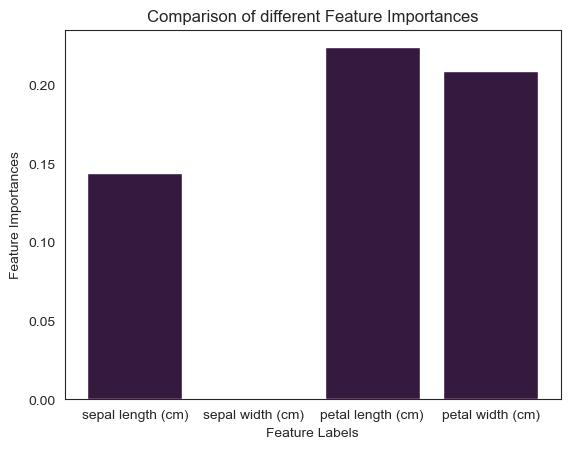

In [143]:
# Load libraries
from sklearn.ensemble import ExtraTreesClassifier

# Load iris data
irisDf = load_iris()
  
# Create features and target
X = irisDf.data
y = irisDf.target
  
# Convert to categorical data by converting data to integers
X = X.astype(int)
 
 # Building the model
extra_tree_forest = ExtraTreesClassifier(n_estimators = 5,
                                        criterion ='entropy', max_features = 2)
  
# Training the model
extra_tree_forest.fit(X, y)
  
# Computing the importance of each feature
feature_importance = extra_tree_forest.feature_importances_
  
# Normalizing the individual importances
feature_importance_normalized = np.std([tree.feature_importances_ for tree in 
                                        extra_tree_forest.estimators_],
                                        axis = 0)

# Plotting a Bar Graph to compare the models
plt.bar(irisDf.feature_names, feature_importance_normalized)
plt.xlabel('Feature Labels')
plt.ylabel('Feature Importances')
plt.title('Comparison of different Feature Importances')
plt.show()

<font color='maroon' size='5'>Feature Extraction</font>
---

In machine learning, pattern recognition, and image processing, feature extraction starts from an initial set of measured data and builds derived values (features) intended to be informative and non-redundant, facilitating the subsequent learning and generalization steps, and in some cases leading to better human interpretations. Feature extraction is related to dimensionality reduction. [[Wiki](https://en.wikipedia.org/wiki/Feature_extraction)]


<font color='darkviolet' size='4'>Dimensionality Reduction </font>
---


- Principal Component Analysis (PCA)
- Independent Component Analysis (ICA)
- Kernel PCA
- Latent Semantic Analysis (LSA)
- Partial Least Aquares (PLS)
- Multifactor Dimensionality Reduction
- Nonlinear Dimensionality Reduction
- Semidefinite Embedding
- Autoencoder


----

<font color='darkviolet' size='3'>Principal Component Analysis (PCA) </font>
--
-----

- Large datasets with hundreds or thousands of features often lead to redundancy especially when features are correlated with each other. Training a model on a high-dimensional dataset having too many features can sometimes lead to **overfitting** (model captures both real and random effects). Also, an overly-complex model having too many features can be hard to interpret. One way to solve the problem of redundancy is via **feature selection** and **dimensionality reduction** techniques such as PCA (principal component analysis) or using the covariance matrix plot.

- There are two ways you could use PCA for feature engineering.

    - 1. The first way is to use it as a descriptive technique. Since the components tell you about the variation, you could compute the Mutual Information (MI) scores for the components and see what kind of variation is most predictive of your target.  You could even try clustering on one or more of the high-scoring components.

    - 2. The second way is to use the components themselves as features. Because the components expose the variational structure of the data directly, they can often be more informative than the original features. Here are some use-cases:

- Dimensionality reduction: When your features are highly redundant (multicollinear, specifically), PCA will partition out the redundancy into one or more near-zero variance components, which you can then drop since they will contain little or no information.

- **Anomaly detection:** Unusual variation, not apparent from the original features, will often show up in the low-variance components. These components could be highly informative in an anomaly or outlier detection task.

- **Noise reduction:** A collection of sensor readings will often share some common background noise. PCA can sometimes collect the (informative) signal into a smaller number of features while leaving the noise alone, thus boosting the signal-to-noise ratio.

- **Decorrelation:** Some ML algorithms struggle with highly-correlated features. PCA transforms correlated features into uncorrelated components, which could be easier for your algorithm to work with.

PCA basically gives you direct access to the correlational structure of your data. You'll no doubt come up with applications of your own!

----



- There are a few things to keep in mind when applying PCA:
    - PCA only works with numeric features, like continuous quantities or counts.
    - PCA is sensitive to scale. It's good practice to standardize your data before applying PCA, unless you know you have good reason not to.
    - Consider removing or constraining outliers, since they can have an undue influence on the results.

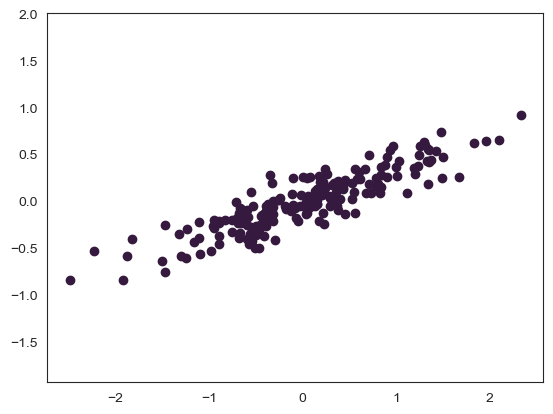

In [183]:
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal');

- `components_`: ndarray of shape (n_components, n_features) 
    - Principal axes in feature space, representing the directions of maximum variance in the data. Equivalently, the right singular vectors of the centered input data, parallel to its eigenvectors. The components are sorted by decreasing `explained_variance_`.


In [199]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

In [200]:
print(pca.components_)

[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]


In [201]:
print(pca.explained_variance_)

[0.7625315 0.0184779]


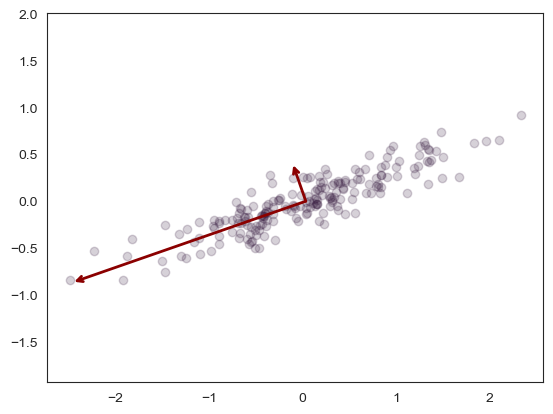

In [202]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2, color='darkred',
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');

In [204]:
pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X)
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)

original shape:    (200, 2)
transformed shape: (200, 1)


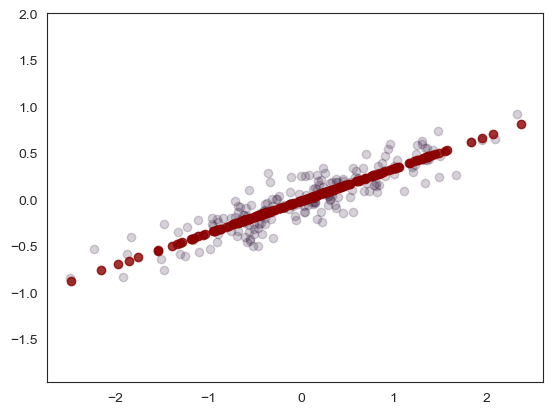

In [206]:
X_new = pca.inverse_transform(X_pca)
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8, color='darkred')
plt.axis('equal');

- `explained_variance_`: ndarray of shape (n_components,)
    - The amount of variance explained by each of the selected components. The variance estimation uses n_samples - 1 degrees of freedom.
    - Equal to n_components **largest eigenvalues of the covariance matrix of X**.
- `explained_variance_ratio_`: ndarray of shape (n_components,)
    - Percentage of variance explained by each of the selected components. 
    - If n_components is not set then all components are stored and the sum of the ratios is equal to 1.0.

In [149]:
ssPenDf.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,-0.896042,0.780732,-1.426752,-0.568475
1,-0.822788,0.119584,-1.069474,-0.506286
2,-0.676280,0.424729,-0.426373,-1.190361
3,-1.335566,1.085877,-0.569284,-0.941606
4,-0.859415,1.747026,-0.783651,-0.692852


In [150]:
from sklearn.decomposition import PCA

# Use n_components=4 to see explained variance for all columns: 
pca = PCA(n_components=4)
pca.fit(ssPenDf)
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_[:2].sum())


[0.68633893 0.19452929 0.09216063 0.02697115]
0.8808682242049919


In [151]:
pca.components_

array([[ 0.45375317, -0.39904723,  0.576825  ,  0.54967471],
       [ 0.6001949 ,  0.79616951,  0.00578817,  0.07646366],
       [ 0.64249509, -0.42580043, -0.23609516, -0.59173738],
       [ 0.14516955, -0.1599044 , -0.78198369,  0.58468615]])

In [152]:
pca.explained_variance_

array([2.75362487, 0.7804609 , 0.36975289, 0.10820954])

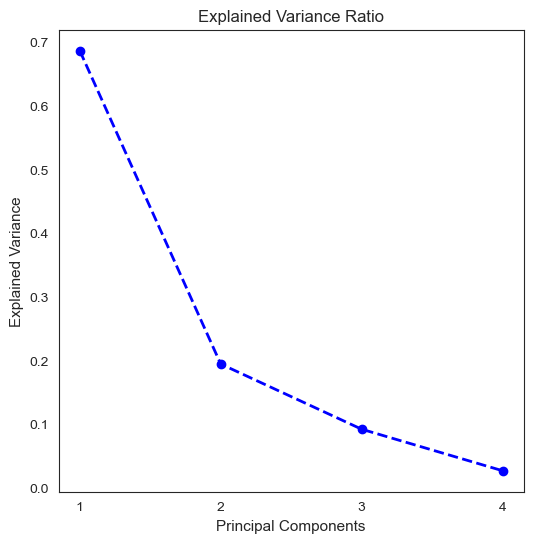

In [153]:
# Visual for each component’s explained variance
fig, ax = plt.subplots(figsize=(6,6))

ax.plot(pca.explained_variance_ratio_,'bo--',linewidth=2)
ax.set_xlabel('Principal Components', fontsize = 11)
ax.set_ylabel('Explained Variance', fontsize = 11)
ax.set_title('Explained Variance Ratio', fontsize = 12)
n = len(pca.explained_variance_ratio_)
plt.xticks(np.arange(n), np.arange(1, n+1));

We see that first two principal components explains 88% of the variance in the data. Now, we can implement PCA with 2 components to visualize Palmer penguins data in 2D.

In [154]:
# Projection onto 2 principal components space: 
pca2 = PCA(n_components=2)
pca2.fit(ssPenDf)
principalComponents = pca2.fit_transform(ssPenDf)
# Define new dataframe with principal components
dfPca = pd.DataFrame(data = principalComponents, columns = [
    'principal component 1', 'principal component 2'])
dfPca = pd.concat([dfPca, penCleanDf[['species']]], axis = 1)
dfPca.head()

,principal component 1,principal component 2,species
0,-1.853593,0.032069,Adelie
1,-1.316254,-0.443527,Adelie
2,-1.376605,-0.161230,Adelie
3,-1.885288,-0.012351,NaN
4,-1.919981,0.817598,Adelie


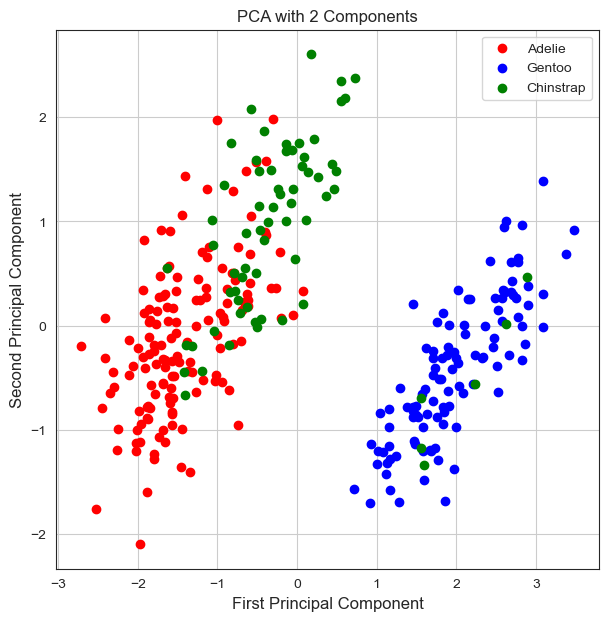

In [155]:
# Visualization of Penguins Data in 2-D after PCA transformation:
fig, ax = plt.subplots(figsize=(7,7)) 
for spe, color in zip(('Adelie', 'Gentoo', 'Chinstrap'), 
                       ('red',   'blue', 'green')): 
    index = dfPca['species'] == spe 
    ax.scatter(dfPca.loc[index, 'principal component 1'],                                                  
                dfPca.loc[index, 'principal component 2'], 
                c = color)
 
ax.set_xlabel('First Principal Component', fontsize = 12)
ax.set_ylabel('Second Principal Component', fontsize = 12)
ax.set_title('PCA with 2 Components', fontsize = 12)
ax.legend(['Adelie', 'Gentoo', 'Chinstrap'])
ax.grid();

<font color='darkviolet' size='4'>Text Feature Extraction</font>
---


Text is a type of data that can come in different formats; there are so many text processing methods that cannot fit in a single article. Nevertheless, we will review the most popular ones.


`scikit-learn` provides utilities for the most common ways to extract numerical features from text content, namely:

- **tokenizing** strings and giving an integer id for each possible token, for instance by using white-spaces and punctuation as token separators.

- **counting** the occurrences of tokens in each document.

- **normalizing** and weighting with diminishing importance tokens that occur in the majority of samples / documents.


1. Before working with text, one must tokenize it. 
2. After tokenization, you will normalize the data. For text, this is about stemming and/or lemmatization;[here](http://nlp.stanford.edu/IR-book/html/htmledition/stemming-and-lemmatization-1.html).


In [156]:
texts = [
    "i have a cat", 
    "you have a dog", 
    "you and i have a cat and a dog"]

vocabulary = list(
    enumerate(set([word for sentence in texts for word in sentence.split()]))
)
print("Vocabulary:", vocabulary)

def vectorize(text):
    vector = np.zeros(len(vocabulary))
    for i, word in vocabulary:
        num = 0
        for w in text:
            if w == word:
                num += 1
        if num:
            vector[i] = num
    return vector

print("Vectors:")
for sentence in texts:
    print(vectorize(sentence.split()))

Vocabulary: [(0, 'dog'), (1, 'i'), (2, 'a'), (3, 'and'), (4, 'cat'), (5, 'you'), (6, 'have')]
Vectors:
[0. 1. 1. 0. 1. 0. 1.]
[1. 0. 1. 0. 0. 1. 1.]
[1. 1. 2. 2. 1. 1. 1.]



Here is an illustration of the process:

<img src='bagOfWords.png' width=75%>

This is an extremely naive implementation. In practice, you need to consider stop words, the maximum length of the vocabulary, more efficient data structures (usually text data is converted to a sparse vector), etc.

When using algorithms like Bag of Words, we lose the order of the words in the text, which means that the texts "i have no cows" and "no, i have cows" will appear identical after vectorization when, in fact, they have the opposite meaning. To avoid this problem, we can revisit our tokenization step and use N-grams (the *sequence* of N consecutive tokens) instead.



**CountVectorizer** implements both tokenization and occurrence counting in a single class:

In [157]:
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer(ngram_range=(1, 1))
vect.fit_transform(["no i have cows", "i have no cows"]).toarray()

array([[1, 1, 1],
       [1, 1, 1]], dtype=int64)

In [158]:
vect.vocabulary_

{'no': 2, 'have': 1, 'cows': 0}

In [159]:
vect = CountVectorizer(ngram_range=(1, 2))
vect.fit_transform(["no i have cows", "i have no cows"]).toarray()

array([[1, 1, 1, 0, 1, 0, 1],
       [1, 1, 0, 1, 1, 1, 0]], dtype=int64)

In [160]:
vect.vocabulary_

{'no': 4,
 'have': 1,
 'cows': 0,
 'no have': 6,
 'have cows': 2,
 'have no': 3,
 'no cows': 5}

Also note that one does not have to use only words. In some cases, it is possible to generate N-grams of characters. This approach would be able to account for similarity of related words or handle typos.

In [161]:
from scipy.spatial.distance import euclidean
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer(ngram_range=(3, 3), analyzer="char_wb")

n1, n2, n3, n4 = vect.fit_transform(
    ["andersen", "petersen", "petrov", "smith"]
).toarray()

euclidean(n1, n2), euclidean(n2, n3), euclidean(n3, n4)

(2.8284271247461903, 3.1622776601683795, 3.3166247903554)

<font color='darkviolet' size='4'>Feature Hashing</font>
---

(Dealing with Large Categorical Variable)


Feature hashing is primarily a dimensionality reduction technique and is often used in Natural Language Processing (NLP). However, hashing can also be useful when we want to vectorize categorical features with several hundred and thousand unique categories. With hashing, we can limit the increase of dimensionality by assigning several unique values to the same hash value.

→ Hashing is thus a low-memory alternative to OneHotEncoding and other feature vectorizing methods.

Hashing works by applying a hash function to the features and using the hash values directly as indices, rather than building a hash table and looking up indices in it individually. The implementation in Sklearn is based on Weinberger [Weinberger et al., 2009].



In [162]:
from sklearn.feature_extraction.text import HashingVectorizer
corpus = [ 
    'This is the first document.',
    'This document is the second document.',
    'And this is the third one.',
    'Is this the first document?']
vectorizer = HashingVectorizer(n_features=2**4, norm=None, alternate_sign=False)

X = vectorizer.fit_transform(corpus).toarray()
print(X)
X.shape

[[1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 2. 0.]
 [2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 2. 0.]
 [0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 2. 2. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 2. 0.]]


(4, 16)

<font color='darkviolet' size='4'>Encoding list of dictionaries</font>
---

We have previously seen that we can use OneHotEncoder transformer to convert integer categorical values into one-hot vectors. But, when the data comes as a list of dictionaries, we can use Scikit-Learn's DictVectorizer transformer to do the same job for us. 

DictVectorizer will only do a binary one-hot encoding when feature values are of type string.


Suppose there is a list of dictionaries given by y as follows:-


`y = df[ {‘foo1’ :  x1}, `
 `{‘foo2’  : x2},`
 `{‘foo3’  : x3}].`


We can use DictVectorizer to do a binary one-hot encoding as follows:-


`from sklearn.preprocessing import DictVectorizer`

`dv = DictVectorizer (sparse = False)`

`X_dv = dv.fit_transform(y)`

`print(X_dv)`

With these categorical features thus encoded, we can proceed as normal with fitting a Scikit-Learn model.

To see the meaning of each column, we can inspect the feature names as follows:-


`dv.get_feature_names()`


In [163]:
tennisDf=[ 
    {'title': 'Australian Open', 'prize money': 3.20},
    {'title': 'French Open',     'prize money': 2.70},
    {'title': 'Wimbledon',       'prize money': 2.91},
    {'title': 'US Open',         'prize money': 3.80}]

In [164]:
# We can use DictVectorizer to do a binary one-hot encoding

from sklearn.feature_extraction import DictVectorizer

dv = DictVectorizer(sparse = False)

xDv = dv.fit_transform(tennisDf)

print(xDv)


[[3.2  1.   0.   0.   0.  ]
 [2.7  0.   1.   0.   0.  ]
 [2.91 0.   0.   0.   1.  ]
 [3.8  0.   0.   1.   0.  ]]


In [165]:
# inspect the feature names

print("The feature names of tennis_df data structure are:\n" , dv.get_feature_names_out())

The feature names of tennis_df data structure are:
 ['prize money' 'title=Australian Open' 'title=French Open' 'title=US Open'
 'title=Wimbledon']


<font color='darkviolet' size='4'>Converting text document to word count vectors</font>
---

We cannot work directly with text data when using machine learning algorithms. Instead, we need to convert the text to numerical representation. Algorithms take numbers as input for further analysis. So, we need to convert text documents to vectors of numbers.


A simple yet effective model for representing text documents in machine learning is called the Bag-of-Words Model, or BoW. It focusses on the occurrence of words in a document. The Scikit-Learn’s CountVectorizer transformer is designed for representing "bag-of-words" technique. CountVectorizer takes the text data as input and count the occurrences of each word within it. The result is a sparse matrix recording the number of times each word appears.


For example, consider the following sample text data:-

`corpus = ['dog', 'cat','dog chases cat']`
    
We can use CountVectorizer to convert data as follows:-


`from sklearn.feature_extraction.text import CountVectorizer`

`cv = CountVectorizer ()`

`data = cv.fit_transform(corpus)`


We can inspect the feature names and view the transformed data as follows:-


`print(cv.get_feature_names())`


`print(data.toarray())`


In [166]:
# View the transformed data

corpus = ['dog', 'cat', 'dog chases cat']

# Use CountVectorizer to convert data

from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()

X_cv = cv.fit_transform(corpus)

print(X_cv.toarray())

[[0 0 1]
 [1 0 0]
 [1 1 1]]


In [167]:
# Inspect the feature names

print("The feature names of the text document corpus are:\n", cv.get_feature_names_out())

The feature names of the text document corpus are:
 ['cat' 'chases' 'dog']


<font color='darkviolet' size='4'>Converting text document to word frequency vectors</font>
---

There is one problem associated with the above approach of converting text document to word count vectors with CountVectorizer. The raw word counts result in features which put too much emphasis on words that appear frequently. This cannot produce desired results in some classification algorithms. 


A solution to the above problem is to calculate word frequencies. We can use Scikit-Learn’s Tfidf transformer to calculate word frequencies. It is commonly called as TF-IDF. TF-IDF stands for **Term Frequency – Inverse Document Frequency**.  TF-IDF weights the word counts by a measure of how often they appear in the documents. 


The TfidfVectorizer will tokenize documents, learn the vocabulary and inverse document frequency weightings, and allow you to encode new documents. TfidfVectorizer is equivalent to CountVectorizer followed by TfidfTransformer (described below).

The syntax for computing TF-IDF features is given below:-


`from sklearn.feature_extraction.text import TfidfVectorizer`

`corpus = ['dog', 'cat', 'dog chases cat']`

`vec =  TfidfVectorizer()`

`X = vec.fit_transform(corpus)`

`print(X.toarray())`



In [168]:
from sklearn.feature_extraction.text import TfidfVectorizer

corpus = ['dog', 'cat', 'dog chases cat']

vec1 =  TfidfVectorizer()

X_tfv = vec1.fit_transform(corpus)

print(X_tfv.toarray())

[[0.         0.         1.        ]
 [1.         0.         0.        ]
 [0.51785612 0.68091856 0.51785612]]


We can inspect the feature names with the following command.

In [169]:
# get feature names

print(vec1.get_feature_names_out())

['cat' 'chases' 'dog']


<font color='darkviolet' size='4'>Transforming a counted matrix to normalized tf-idf representation</font>
---

We have previously seen that CountVectorizer takes the text data as input and count the occurrences of each 
word within it. The result is a sparse matrix recording the number of times each word appears.

If we already have such a matrix, we can use it with a TfidfTransformer to calculate the inverse 
document frequencies (idf) and start encoding documents.


In [170]:
# Calculate inverse document frequencies (idf)

from sklearn.feature_extraction.text import TfidfTransformer

vec2 =  TfidfTransformer()

X_tft = vec2.fit_transform(X_cv)

print(X_tft.toarray())

[[0.         0.         1.        ]
 [1.         0.         0.        ]
 [0.51785612 0.68091856 0.51785612]]


<font color='maroon' size='5'>Creating Features</font>
---

- 
Generate polynomial and interaction features.

Generate a new feature matrix consisting of all polynomial combinations of the features with degree less than or equal to the specified degree. For example, if an input sample is two dimensional and of the form [a, b], the degree-2 polynomial features are [$1, a, b, a^2, ab, b^2$].

<font color='maroon' size='5'>Feature Discretization</font>
---

- A demonstration of feature discretization on synthetic classification datasets. Feature discretization decomposes each feature into a set of bins, here equally distributed in width. The discrete values are then one-hot encoded, and given to a linear classifier. This preprocessing enables a non-linear behavior even though the classifier is linear.

<font color='darkviolet' size='4'>Binning / Bucketizing</font>
---

- 
**Binning is used for both categorical and numerical data.** As the name suggests, the goal is to map the values of the features to “bins” and replace the original value with the value that represents the bin.

For example, if we had a dataset with values ranging from 0 to 100 and we wanted to group those values into bins of size 10, we might create bins for values 0–9, 10–19, 20–29 and so on.

→ In this case, the original values would be replaced with the value that represents the bin to which they belong, such as 10, 20, 30, etc. This can help visualize and analyze the data.

Since we are reducing the number of unique values in the data set, it can help to:
- prevent overfitting
- increase the robustness of the model and mitigate the influence of anomalies
- reduce the model complexity and the required resources to train the model

Systematic binning can help the algorithm to detect underlying patterns more easily and efficiently. It is especially helpful if we can already form a hypothesis before we are defining the bins.

Binning can be used for both numeric and categorical values, e.g.:


bucketizing.webp


In the following, I describe how this might look for numeric and categorical attributes using three examples:

Numeric — How binning can be used when building a streaming recommender— a use case I found in the book Feature Engineering for Machine Learning by [Zheng, Alice, and Amanda Casari. 2018]
Numeric — Census Income Data set: Binning applied to the “Age” column
Categorical —Binning in Supply Chain: Assign countries to bins, depending on the target variable

In [171]:
diaDubClean.head(2)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31


In [172]:
diaDubClean.depth.unique()

array([61.5, 59.8, 56.9, 62.4, 63.3, 62.8, 62.3, 61.9, 65.1, 59.4, 64. ,
       60.4, 62.2, 60.2, 60.9, 62. , 63.4, 63.8, 62.7, 61. , 58.1, 62.5,
       60.5, 60. , 60.7, 59.5, 58.2, 64.1, 60.8, 61.8, 61.2, 61.1, 65.2,
       58.4, 63.1, 61.6, 59.3, 62.6, 63. , 63.2, 62.1, 61.4, 62.9, 63.7,
       59.2, 59.9, 57.9, 55.1, 57.5, 66.3, 61.7, 58.8, 64.5, 65.3, 59.6,
       64.4, 65.7, 63.6, 61.3, 60.1, 60.3, 58. , 64.6, 59.7, 57.8, 67.9,
       60.6, 57.2, 64.2, 65.8, 67.4, 59. , 63.5, 67.3, 58.7, 66.4, 68.1,
       63.9, 55. , 58.6, 64.3, 58.5, 65. , 56. , 58.3, 53.1, 64.9, 59.1,
       58.9, 66.7, 57.7, 65.4, 53.3, 53. , 67.8, 66.1, 55.8, 67.6, 68.2,
       65.5, 67.7, 69.5, 56.6, 56.3, 66.9, 66. , 67. , 57.6, 67.1, 65.6,
       64.8, 69.3, 66.2, 55.4, 66.8, 64.7, 66.6, 55.9, 57.3, 57.4, 68.3,
       68.5, 56.2, 65.9, 56.5, 56.1, 66.5, 68.4, 69.7, 57.1, 68.7, 56.7,
       68.6, 71.6, 43. , 68.8, 67.5, 69. , 55.2, 68.9, 69.6, 57. , 56.4,
       56.8, 44. , 67.2, 70.1, 71.3, 70.6, 69.8, 71

In [173]:
print(diaDubClean.table.min(), '-', diaDubClean.table.max())

43.0 - 95.0


In [174]:
from sklearn.preprocessing import KBinsDiscretizer

# define bucketizer
kbinDis = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='uniform')

kbinDis.fit(diaDubClean[['depth']])
# transform data
dDepth = kbinDis.transform(diaDubClean[['depth']])
print(dDepth)

[[1.]
 [1.]
 [1.]
 ...
 [1.]
 [1.]
 [1.]]


In [175]:
diaDf['depthDisc'] = dDepth
diaDf.tail()

,carat,cut,color,clarity,depth,table,price,x,y,z,logTransPrice,bxCxTransPrice,boxCoxTransPrice,depthDisc
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50,3.440594,19.383096,3.440594,1.0
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61,3.440594,19.383096,3.440594,1.0
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56,3.440594,19.383096,3.440594,1.0
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74,3.440594,19.383096,3.440594,1.0
53939,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64,3.440594,19.383096,3.440594,1.0


Sometimes it may be useful to convert the data back into the original feature space. The `inverse_transform` function converts the binned data into the original feature space. Each value will be equal to the mean of the two bin edges.

In [176]:
diaDf.depthDisc.unique()

array([1., 2., 0.])

In [177]:
print(kbinDis.bin_edges_[0])
print(kbinDis.inverse_transform(dDepth))

[43. 55. 67. 79.]
[[61.]
 [61.]
 [61.]
 ...
 [61.]
 [61.]
 [61.]]


In [178]:
# transform the dataset with KBinsDiscretizer
kbinDis = KBinsDiscretizer(n_bins=7, encode="onehot")
tDis = kbinDis.fit_transform(diaDubClean[['table']])

In [179]:
print(tDis.toarray())

[[0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


<font color='maroon' size='5'>In what order to perform feature engineering?</font>
---



Please mention the order of performing. Also mention why ?

- Feature selection
- Dealing with outliers
- Dimensionality Reduction
- Feature Scaling

It depends on what you exactly need for your use-case, but if you remove outliers after standardizing, the resulting data won't be standardized anymore (if many outliers are removed, standard deviation could become considerably smaller than 1)

So, if you are about to use a procedure where scaled data in needed, you should definitely remove your outliers first, then standardize. Otherwise you may end up with different variables having different standard deviations (which is an issue, for example, in PCA analysis)


### References


- https://towardsdatascience.com/7-of-the-most-used-feature-engineering-techniques-bcc50f48474d

- Feature Engineering for Machine Learning: Principles and Techniques for Data Scientists- by Alice Zheng and Amanda Casari
-  Data Wrangling with Python: Tips and Tools to Make Your Life Easier- by Jacqueline Kazil and David Beazley
- Feature Engineering and Selection: A Practical Approach for Predictive Models- by Kjell Johnson and Max Kuhn
- https://www.kaggle.com/learn/feature-engineering
- https://towardsdatascience.com/understanding-feature-engineering-part-2-categorical-data-f54324193e63
- https://machinelearningmastery.com/discover-feature-engineering-how-to-engineer-features-and-how-to-get-good-at-it/
- https://www.kaggle.com/code/volhaleusha/titanic-tutorial-encoding-feature-eng-81-8